In [1]:
import numpy as np
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# combine th data


BRAND=[]
MODEL=[]
YEAR=[]
KM=[]
CC=[]
OWNER=[]
LOCATION=[]
PRICE=[]
ORIGINAL_PRICE=[]

for page in range(1,17):

    url = f"https://www.credr.com/all-used-bikes-in-Bangalore?page={page}"
    #https://www.credr.com/all-used-bikes-in-Bangalore?page=3
    requests.get(url)
    request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}
    page = requests.get(url,headers =request_header)
    page=requests.get(url)
    page.text
    Soup = BeautifulSoup(page.text)
    section =Soup.find_all('div', class_='card-body')


    for i in section:
        text = i.get_text(separator=" ", strip=True)
        brand = re.findall(r'^(Hero|Honda|Bajaj|TVS|Piaggio|Yamaha|KTM|Suzuki|Royal Enfield)',text)
        if brand:
            BRAND.append(brand[0])
        else:
            BRAND.append(np.nan)
    #models
        model=re.findall(r"^(?:Hero|Honda|Bajaj|TVS|Piaggio|Yamaha|KTM|Suzuki|Royal Enfield)\s+(.+?)(?=\d{4})",text)
        if model:
            MODEL.append(model[0])
        else:
            MODEL.append(np.nan)
    # Year
        year = re.findall(r'(?<=\b)(20\d{2})(?=\b)', text)
        if year:
            YEAR.append(year[0])
        else:
            YEAR.append(np.nan)
    
    # Running KM
        km=re.findall(r'(\d{1,3}(?:,\d{3})?)\s*kms',text)
        if km:
            KM.append(km[0])
        else:
            KM.append(np.nan)
            
    # Engine Capacity
        cc=re.findall(r'(\d{2,4})\s*cc',text)
        if cc:
            CC.append(cc[0])
        else:
            CC.append(np.nan)
    # OWNER
        owner= re.findall(r'\d\s+owner[s]?',text)
        if owner:
            OWNER.append(owner[0])
        else:
            OWNER.append(np.nan)
            
    # Location
        location= re.findall('r([A-Za-z\s]+,\s*Bangalore)',text)
        if location:
            LOCATION.append(location[0])
        else:
            LOCATION.append(np.nan)
    # PRICE
        price = re.findall(r'₹\s?([\d,]+)', text)
        if price:
            PRICE.append(price[0])
        else:
            PRICE.append(np.nan)
    #Original Price
        # ORIGINAL PRICE
        original_price = re.findall(r'[\d,]+$', text)
        if original_price:
            ORIGINAL_PRICE.append(original_price[0])
        else:
            ORIGINAL_PRICE.append(np.nan)

<>:68: SyntaxWarning: invalid escape sequence '\s'
<>:68: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Abhijeet\AppData\Local\Temp\ipykernel_11808\2741386965.py:68: SyntaxWarning: invalid escape sequence '\s'
  location= re.findall('r([A-Za-z\s]+,\s*Bangalore)',text)


In [3]:
data={'brand':BRAND,
      'model':MODEL,
      'year':YEAR,
      'km':KM,
      'cc':CC,
      'owner':OWNER,
      'location':LOCATION,
      'price':PRICE,
      'original_price':ORIGINAL_PRICE
}     

In [4]:
df = pd.DataFrame(data)
df

,brand,model,year,km,cc,owner,location,price,original_price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,NaN,NaN,2013,"26,008",109,1 owner,"Indira Nagar,Bangalore","55,000",232
2,Honda,Activa Std,2013,"26,008",109,1 owner,"Indira Nagar,Bangalore","55,000","58,000"
3,Honda,Activa 5G,2020,"15,036",109,2 owners,"s Indira Nagar,Bangalore","83,000","86,000"
4,Honda,Activa 6G,2022,"11,918",109,1 owner,"Indira Nagar,Bangalore","93,000","96,000"
...,...,...,...,...,...,...,...,...,...
507,Hero,Duet VX,2018,"19,090",110,2 owners,"s Koramangala,Bangalore","58,000","61,000"
508,TVS,Ntorq 125,2018,"19,235",124,1 owner,"Koramangala,Bangalore","71,000","74,000"
509,TVS,Jupiter Std,2016,"24,563",110,1 owner,"Koramangala,Bangalore","54,000","57,000"
510,Hero,Maestro EDGE,2018,"18,079",110,1 owner,"Koramangala,Bangalore","58,000","61,000"


In [5]:
#df.dropna(ignore_index= True , inplace = True)
df.isna().sum()

brand             38
model             38
year              16
km                19
cc                16
owner             16
location          16
price              0
original_price    16
dtype: int64

In [6]:
# number of null columns in owner column
df.loc[df['owner'].isna()] 

,brand,model,year,km,cc,owner,location,price,original_price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [7]:
df.loc[df['owner'].isna()].shape[0] / len(df) * 100

3.125

In [8]:
df.dropna(subset = ['owner'], ignore_index= True , inplace = True)
df.isna().sum()

brand             22
model             22
year               0
km                 3
cc                 0
owner              0
location           0
price              0
original_price     0
dtype: int64

In [9]:
df['brand'].isna().sum() / len(df) * 100


4.435483870967742

In [10]:
df.dropna(subset = ['brand'], ignore_index= True , inplace = True)
df.isna().sum()

brand             0
model             0
year              0
km                3
cc                0
owner             0
location          0
price             0
original_price    0
dtype: int64

In [11]:
df

,brand,model,year,km,cc,owner,location,price,original_price
0,Honda,Activa Std,2013,"26,008",109,1 owner,"Indira Nagar,Bangalore","55,000","58,000"
1,Honda,Activa 5G,2020,"15,036",109,2 owners,"s Indira Nagar,Bangalore","83,000","86,000"
2,Honda,Activa 6G,2022,"11,918",109,1 owner,"Indira Nagar,Bangalore","93,000","96,000"
3,Honda,Activa 5G,2019,"10,647",109,1 owner,"Indira Nagar,Bangalore","77,000","80,000"
4,Honda,Activa 5G,2019,"28,508",109,2 owners,"s Indira Nagar,Bangalore","77,000","80,000"
...,...,...,...,...,...,...,...,...,...
469,Hero,Duet VX,2018,"19,090",110,2 owners,"s Koramangala,Bangalore","58,000","61,000"
470,TVS,Ntorq 125,2018,"19,235",124,1 owner,"Koramangala,Bangalore","71,000","74,000"
471,TVS,Jupiter Std,2016,"24,563",110,1 owner,"Koramangala,Bangalore","54,000","57,000"
472,Hero,Maestro EDGE,2018,"18,079",110,1 owner,"Koramangala,Bangalore","58,000","61,000"


In [12]:
df.loc[df['km'].isna()] 

,brand,model,year,km,cc,owner,location,price,original_price
164,Honda,CB Hornet 160R,2016,NaN,162,1 owner,"Bellandur,Bangalore","83,000","86,000"
324,TVS,Jupiter Std,2015,NaN,109,2 owners,"s Indiranagar,Bangalore","50,000","53,000"
393,Honda,Unicorn 160,2016,NaN,162,1 owner,"Indiranagar,Bangalore","66,000","69,000"


In [13]:
df.fillna(method='ffill', inplace=True)


C:\Users\Abhijeet\AppData\Local\Temp\ipykernel_11808\4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [14]:
df

,brand,model,year,km,cc,owner,location,price,original_price
0,Honda,Activa Std,2013,"26,008",109,1 owner,"Indira Nagar,Bangalore","55,000","58,000"
1,Honda,Activa 5G,2020,"15,036",109,2 owners,"s Indira Nagar,Bangalore","83,000","86,000"
2,Honda,Activa 6G,2022,"11,918",109,1 owner,"Indira Nagar,Bangalore","93,000","96,000"
3,Honda,Activa 5G,2019,"10,647",109,1 owner,"Indira Nagar,Bangalore","77,000","80,000"
4,Honda,Activa 5G,2019,"28,508",109,2 owners,"s Indira Nagar,Bangalore","77,000","80,000"
...,...,...,...,...,...,...,...,...,...
469,Hero,Duet VX,2018,"19,090",110,2 owners,"s Koramangala,Bangalore","58,000","61,000"
470,TVS,Ntorq 125,2018,"19,235",124,1 owner,"Koramangala,Bangalore","71,000","74,000"
471,TVS,Jupiter Std,2016,"24,563",110,1 owner,"Koramangala,Bangalore","54,000","57,000"
472,Hero,Maestro EDGE,2018,"18,079",110,1 owner,"Koramangala,Bangalore","58,000","61,000"


In [15]:
df.loc[df['km'].isna()] 

,brand,model,year,km,cc,owner,location,price,original_price


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           474 non-null    object
 1   model           474 non-null    object
 2   year            474 non-null    object
 3   km              474 non-null    object
 4   cc              474 non-null    object
 5   owner           474 non-null    object
 6   location        474 non-null    object
 7   price           474 non-null    object
 8   original_price  474 non-null    object
dtypes: object(9)
memory usage: 33.5+ KB


In [17]:
df.dropna(subset = ['km'], ignore_index= True , inplace = True)
df.isna().sum()

brand             0
model             0
year              0
km                0
cc                0
owner             0
location          0
price             0
original_price    0
dtype: int64

## Observation :


In [19]:
df.shape

(474, 9)

In [21]:
df.to_csv('Credr_Clining')

In [22]:
import pandas as pd

In [23]:
df=pd.read_csv("C:/Users/Abhijeet/Downloads/Credr_Clining")

In [24]:
df.head()

,Unnamed: 0,brand,model,year,km,cc,owner,location,price,original_price
0,0,Honda,Activa Std,2013,"26,008",109,1 owner,"Indira Nagar,Bangalore","55,000","58,000"
1,1,Honda,Activa 5G,2020,"15,036",109,2 owners,"s Indira Nagar,Bangalore","83,000","86,000"
2,2,Honda,Activa 6G,2022,"11,918",109,1 owner,"Indira Nagar,Bangalore","93,000","96,000"
3,3,Honda,Activa 5G,2019,"10,647",109,1 owner,"Indira Nagar,Bangalore","77,000","80,000"
4,4,Honda,Activa 5G,2019,"28,508",109,2 owners,"s Indira Nagar,Bangalore","77,000","80,000"


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      474 non-null    int64 
 1   brand           474 non-null    object
 2   model           474 non-null    object
 3   year            474 non-null    int64 
 4   km              474 non-null    object
 5   cc              474 non-null    int64 
 6   owner           474 non-null    object
 7   location        474 non-null    object
 8   price           474 non-null    object
 9   original_price  474 non-null    object
dtypes: int64(3), object(7)
memory usage: 37.2+ KB


In [26]:
# convert brand names capitalcase to lowercase

df['brand'] = df['brand'].apply(lambda x : x.lower())

In [27]:
df['brand'].dtypes

dtype('O')

In [28]:
df['year'] = df['year'].astype(str)

In [29]:
df.dtypes

Unnamed: 0         int64
brand             object
model             object
year              object
km                object
cc                 int64
owner             object
location          object
price             object
original_price    object
dtype: object

In [30]:
# remove ',' from the km data

df['km'] = df['km'].replace(',','',regex = True)
df['km'] = pd.to_numeric(df['km'])
df['km'].head(10)

0    26008
1    15036
2    11918
3    10647
4    28508
5    22331
6    19654
7    18200
8    32308
9    18236
Name: km, dtype: int64

In [31]:
df['km'].dtypes

dtype('int64')

In [32]:
df.head()

,Unnamed: 0,brand,model,year,km,cc,owner,location,price,original_price
0,0,honda,Activa Std,2013,26008,109,1 owner,"Indira Nagar,Bangalore","55,000","58,000"
1,1,honda,Activa 5G,2020,15036,109,2 owners,"s Indira Nagar,Bangalore","83,000","86,000"
2,2,honda,Activa 6G,2022,11918,109,1 owner,"Indira Nagar,Bangalore","93,000","96,000"
3,3,honda,Activa 5G,2019,10647,109,1 owner,"Indira Nagar,Bangalore","77,000","80,000"
4,4,honda,Activa 5G,2019,28508,109,2 owners,"s Indira Nagar,Bangalore","77,000","80,000"


In [33]:
# remove repeated word 'owner' from to the owner

df['owner'] = pd.to_numeric(df['owner'].apply(lambda x : x.split('owner')[0]))
df['owner'].head(10)

0    1
1    2
2    1
3    1
4    2
5    1
6    1
7    1
8    1
9    1
Name: owner, dtype: int64

In [34]:
df

,Unnamed: 0,brand,model,year,km,cc,owner,location,price,original_price
0,0,honda,Activa Std,2013,26008,109,1,"Indira Nagar,Bangalore","55,000","58,000"
1,1,honda,Activa 5G,2020,15036,109,2,"s Indira Nagar,Bangalore","83,000","86,000"
2,2,honda,Activa 6G,2022,11918,109,1,"Indira Nagar,Bangalore","93,000","96,000"
3,3,honda,Activa 5G,2019,10647,109,1,"Indira Nagar,Bangalore","77,000","80,000"
4,4,honda,Activa 5G,2019,28508,109,2,"s Indira Nagar,Bangalore","77,000","80,000"
...,...,...,...,...,...,...,...,...,...,...
469,469,hero,Duet VX,2018,19090,110,2,"s Koramangala,Bangalore","58,000","61,000"
470,470,tvs,Ntorq 125,2018,19235,124,1,"Koramangala,Bangalore","71,000","74,000"
471,471,tvs,Jupiter Std,2016,24563,110,1,"Koramangala,Bangalore","54,000","57,000"
472,472,hero,Maestro EDGE,2018,18079,110,1,"Koramangala,Bangalore","58,000","61,000"


In [35]:
# remove 's' repeated word from to the location

df['location'] = df['location'].replace('s','',regex = True)

In [36]:
df['location'] = df['location'].apply(lambda x : x.lower())

In [37]:
df

,Unnamed: 0,brand,model,year,km,cc,owner,location,price,original_price
0,0,honda,Activa Std,2013,26008,109,1,"indira nagar,bangalore","55,000","58,000"
1,1,honda,Activa 5G,2020,15036,109,2,"indira nagar,bangalore","83,000","86,000"
2,2,honda,Activa 6G,2022,11918,109,1,"indira nagar,bangalore","93,000","96,000"
3,3,honda,Activa 5G,2019,10647,109,1,"indira nagar,bangalore","77,000","80,000"
4,4,honda,Activa 5G,2019,28508,109,2,"indira nagar,bangalore","77,000","80,000"
...,...,...,...,...,...,...,...,...,...,...
469,469,hero,Duet VX,2018,19090,110,2,"koramangala,bangalore","58,000","61,000"
470,470,tvs,Ntorq 125,2018,19235,124,1,"koramangala,bangalore","71,000","74,000"
471,471,tvs,Jupiter Std,2016,24563,110,1,"koramangala,bangalore","54,000","57,000"
472,472,hero,Maestro EDGE,2018,18079,110,1,"koramangala,bangalore","58,000","61,000"


In [38]:
# remove ',' from the price data

df['price'] = df['price'].replace(',','',regex = True)
df['price'] = pd.to_numeric(df['price'])
df['price'].head(10)

0    55000
1    83000
2    93000
3    77000
4    77000
5    77000
6    77000
7    77000
8    77000
9    77000
Name: price, dtype: int64

In [39]:
df['price'].dtypes

dtype('int64')

In [40]:
df

,Unnamed: 0,brand,model,year,km,cc,owner,location,price,original_price
0,0,honda,Activa Std,2013,26008,109,1,"indira nagar,bangalore",55000,"58,000"
1,1,honda,Activa 5G,2020,15036,109,2,"indira nagar,bangalore",83000,"86,000"
2,2,honda,Activa 6G,2022,11918,109,1,"indira nagar,bangalore",93000,"96,000"
3,3,honda,Activa 5G,2019,10647,109,1,"indira nagar,bangalore",77000,"80,000"
4,4,honda,Activa 5G,2019,28508,109,2,"indira nagar,bangalore",77000,"80,000"
...,...,...,...,...,...,...,...,...,...,...
469,469,hero,Duet VX,2018,19090,110,2,"koramangala,bangalore",58000,"61,000"
470,470,tvs,Ntorq 125,2018,19235,124,1,"koramangala,bangalore",71000,"74,000"
471,471,tvs,Jupiter Std,2016,24563,110,1,"koramangala,bangalore",54000,"57,000"
472,472,hero,Maestro EDGE,2018,18079,110,1,"koramangala,bangalore",58000,"61,000"


In [41]:
# remove ',' from the original price

df['original_price'] = df['original_price'].replace(',','',regex = True)
df['original_price'] = pd.to_numeric(df['original_price'])
df['original_price'].head(10)

0    58000
1    86000
2    96000
3    80000
4    80000
5    80000
6    80000
7    80000
8    80000
9    80000
Name: original_price, dtype: int64

In [42]:
df['original_price'].dtypes

dtype('int64')

In [43]:
df

,Unnamed: 0,brand,model,year,km,cc,owner,location,price,original_price
0,0,honda,Activa Std,2013,26008,109,1,"indira nagar,bangalore",55000,58000
1,1,honda,Activa 5G,2020,15036,109,2,"indira nagar,bangalore",83000,86000
2,2,honda,Activa 6G,2022,11918,109,1,"indira nagar,bangalore",93000,96000
3,3,honda,Activa 5G,2019,10647,109,1,"indira nagar,bangalore",77000,80000
4,4,honda,Activa 5G,2019,28508,109,2,"indira nagar,bangalore",77000,80000
...,...,...,...,...,...,...,...,...,...,...
469,469,hero,Duet VX,2018,19090,110,2,"koramangala,bangalore",58000,61000
470,470,tvs,Ntorq 125,2018,19235,124,1,"koramangala,bangalore",71000,74000
471,471,tvs,Jupiter Std,2016,24563,110,1,"koramangala,bangalore",54000,57000
472,472,hero,Maestro EDGE,2018,18079,110,1,"koramangala,bangalore",58000,61000


In [44]:
# remove "," and  "bangalore" from the location data

df['location'] = df['location'].replace(',bangalore','',regex = True)

In [45]:
df

,Unnamed: 0,brand,model,year,km,cc,owner,location,price,original_price
0,0,honda,Activa Std,2013,26008,109,1,indira nagar,55000,58000
1,1,honda,Activa 5G,2020,15036,109,2,indira nagar,83000,86000
2,2,honda,Activa 6G,2022,11918,109,1,indira nagar,93000,96000
3,3,honda,Activa 5G,2019,10647,109,1,indira nagar,77000,80000
4,4,honda,Activa 5G,2019,28508,109,2,indira nagar,77000,80000
...,...,...,...,...,...,...,...,...,...,...
469,469,hero,Duet VX,2018,19090,110,2,koramangala,58000,61000
470,470,tvs,Ntorq 125,2018,19235,124,1,koramangala,71000,74000
471,471,tvs,Jupiter Std,2016,24563,110,1,koramangala,54000,57000
472,472,hero,Maestro EDGE,2018,18079,110,1,koramangala,58000,61000


In [46]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [47]:
df.head()

,brand,model,year,km,cc,owner,location,price,original_price
0,honda,Activa Std,2013,26008,109,1,indira nagar,55000,58000
1,honda,Activa 5G,2020,15036,109,2,indira nagar,83000,86000
2,honda,Activa 6G,2022,11918,109,1,indira nagar,93000,96000
3,honda,Activa 5G,2019,10647,109,1,indira nagar,77000,80000
4,honda,Activa 5G,2019,28508,109,2,indira nagar,77000,80000


In [48]:
df.describe()

,km,cc,owner,price,original_price
count,474.000000,474.000000,474.000000,4.740000e+02,4.740000e+02
mean,20906.567511,137.229958,1.301688,8.085470e+04,8.386947e+04
std,6921.441331,53.411679,0.503389,7.240733e+04,7.240440e+04
min,2.000000,11.000000,1.000000,3.600000e+04,3.900000e+04
25%,18208.250000,109.000000,1.000000,5.900000e+04,6.200000e+04
50%,20356.500000,124.000000,1.000000,7.099500e+04,7.399500e+04
75%,25133.500000,149.000000,2.000000,8.500000e+04,8.800000e+04
max,82149.000000,350.000000,3.000000,1.117000e+06,1.120000e+06


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           474 non-null    object
 1   model           474 non-null    object
 2   year            474 non-null    object
 3   km              474 non-null    int64 
 4   cc              474 non-null    int64 
 5   owner           474 non-null    int64 
 6   location        474 non-null    object
 7   price           474 non-null    int64 
 8   original_price  474 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 33.5+ KB


In [50]:
df.apply(pd.Series.unique)

brand             [honda, tvs, suzuki, yamaha, royal enfield, he...
model             [Activa Std , Activa 5G , Activa 6G , Scooty Z...
year              [2013, 2020, 2022, 2019, 2015, 2017, 2018, 201...
km                [26008, 15036, 11918, 10647, 28508, 22331, 196...
cc                [109, 125, 149, 346, 124, 180, 249, 163, 150, ...
owner                                                     [1, 2, 3]
location          [ indira nagar,  bellandur,  sarjapur,  indira...
price             [55000, 83000, 93000, 77000, 59000, 103000, 15...
original_price    [58000, 86000, 96000, 80000, 62000, 106000, 15...
dtype: object

In [51]:
######################################EDA##############################

In [52]:
## split into numerical and categorical 
numerical_columns= df.select_dtypes(include= ['int64']).columns.tolist()
numerical_columns

['km', 'cc', 'owner', 'price', 'original_price']

In [53]:
categorical_columns= df.select_dtypes(include= ['object']).columns.tolist()
categorical_columns

['brand', 'model', 'year', 'location']

In [54]:
print(numerical_columns)
print('-'*50)
print(categorical_columns)

['km', 'cc', 'owner', 'price', 'original_price']
--------------------------------------------------
['brand', 'model', 'year', 'location']


## Distribution of Data 

km                   Axes(0.125,0.786098;0.168478x0.0939024)
cc                Axes(0.327174,0.786098;0.168478x0.0939024)
owner             Axes(0.529348,0.786098;0.168478x0.0939024)
price             Axes(0.731522,0.786098;0.168478x0.0939024)
original_price       Axes(0.125,0.673415;0.168478x0.0939024)
dtype: object

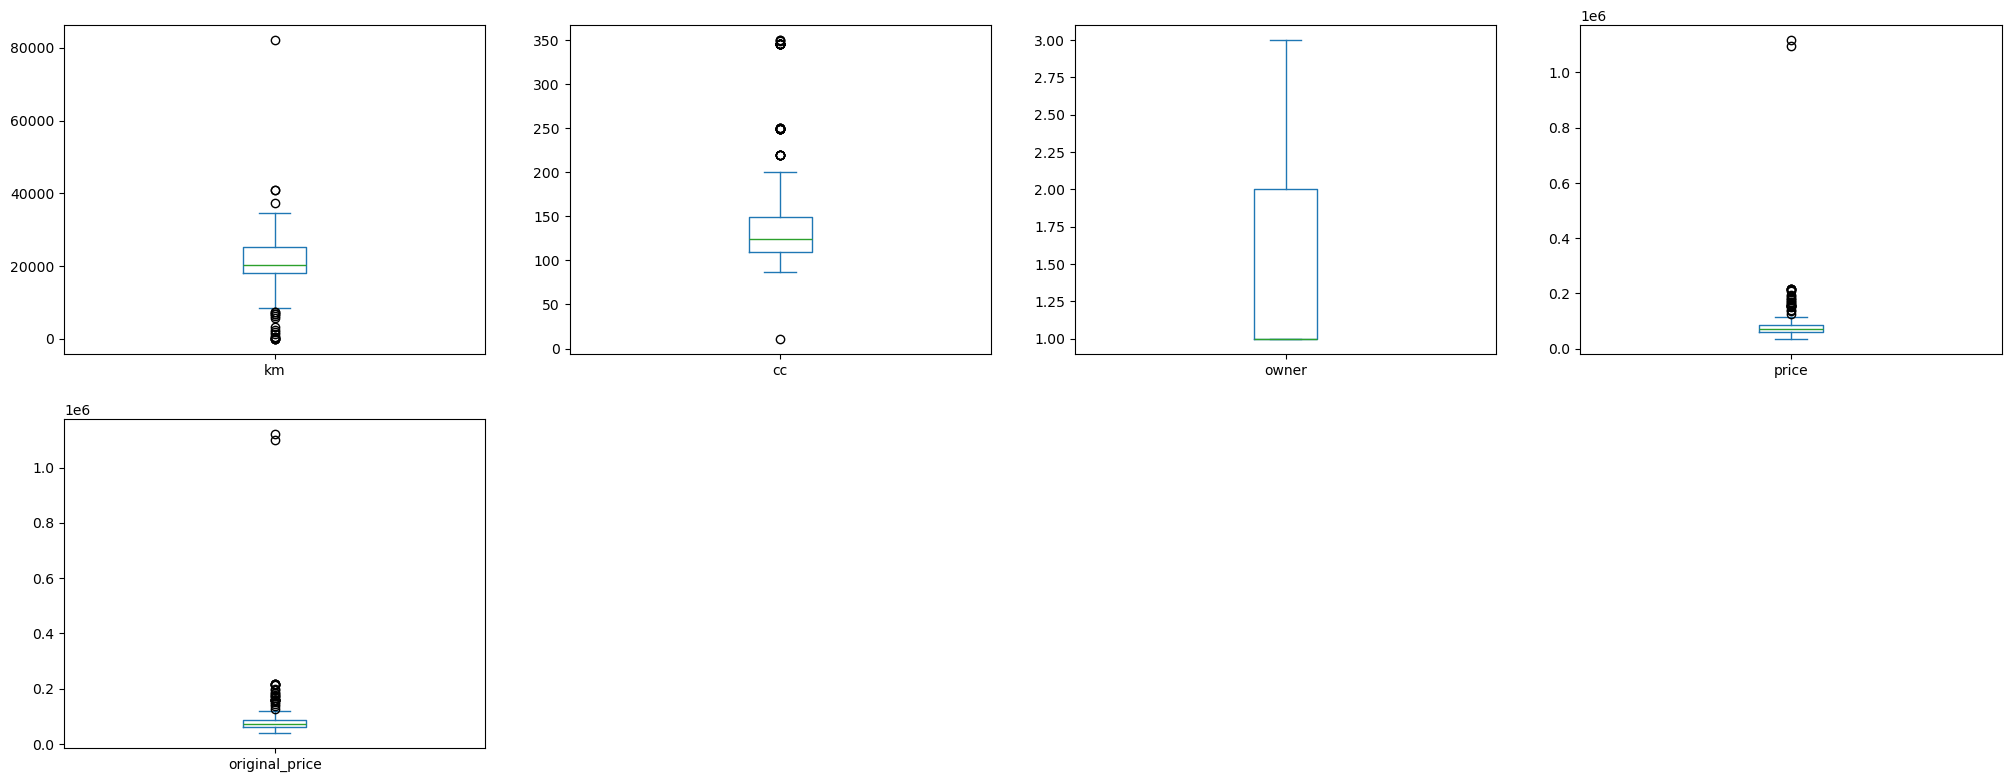

In [56]:
df[numerical_columns].plot(kind= 'box',
                            subplots= True,
                            figsize=(25,35),
                            layout= (7,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

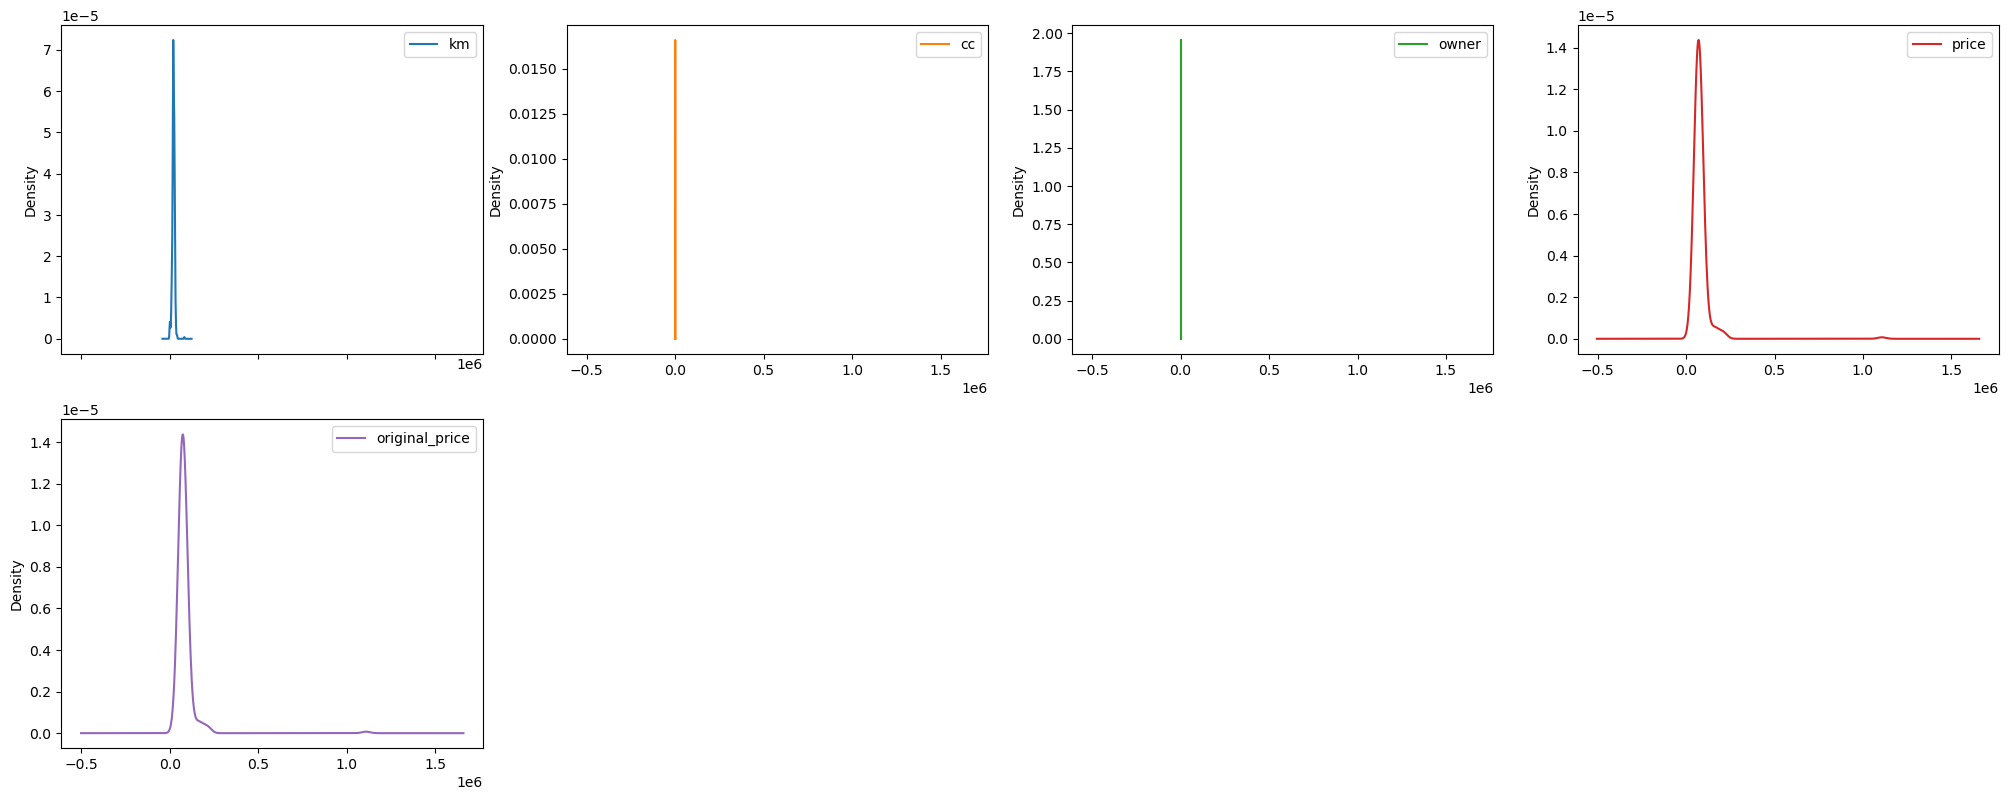

In [57]:
df[numerical_columns].plot(kind= 'kde',
                            subplots= True,
                            figsize=(25,35),
                            layout= (7,4))

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

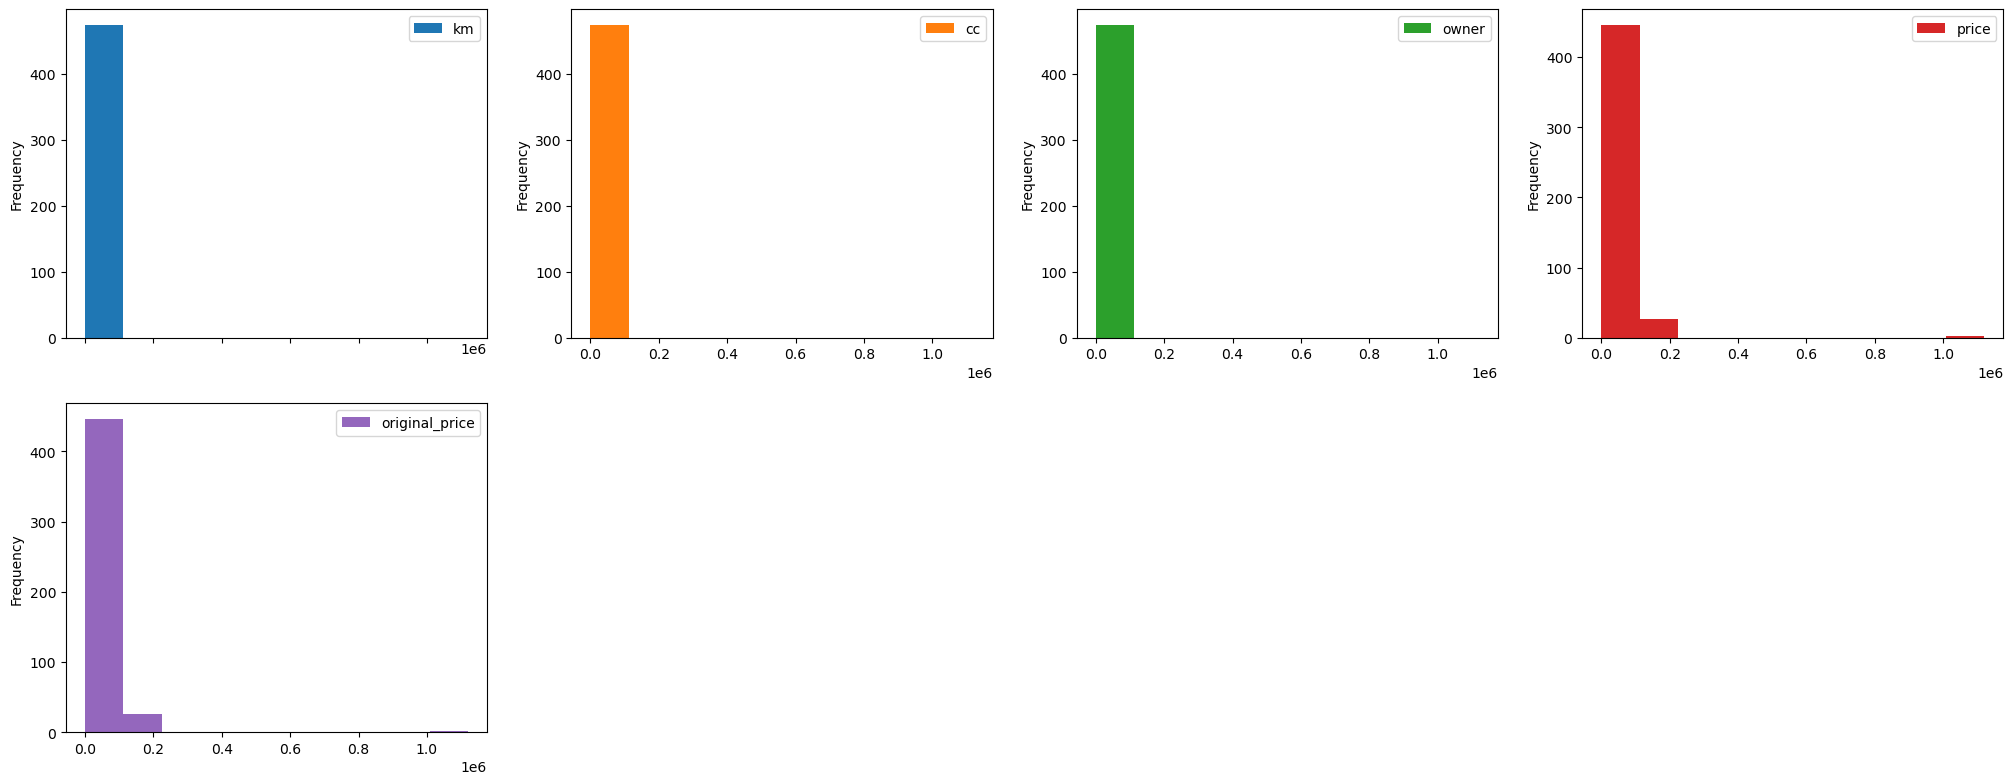

In [58]:
df[numerical_columns].plot(kind= 'hist',
                            subplots= True,
                            figsize=(25,35),
                            layout= (7,4))

## Univariate analysis 

## Numerical data

In [61]:
def num_uni_analysis(df,col):
    print("-"*10,col,"-"*10)
    print(f'Non-Visual analysis of {col} column')
    print()
    print(df[col].describe())
    print()
    print(f'Visual analysis of {col} column')

    #Visual Analysis
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), facecolor = 'lavender',alpha=0.5) 
    plt.suptitle(f'Data Distribution Of {col}')
    #-------------------------------------

    ax[0].hist(df[col] , color = 'lightcoral',edgecolor='black')  #royalblue
    ax[0].set_title(f'Histogram of {col}')
    ax[0].set_xlabel(col)

#------------------------------------
    #plt.figure(figsize = (8,8))
    #plt.subplot(1,3,1)
    sns.boxplot(data=df[col], ax=ax[1], fill=True,orient = 'h', color = 'royalblue')
    ax[1].set_title(f'Boxplot of {col}')

#------------------------------------
    #plt.figure(figsize = (8,8))
    #plt.subplot(1,3,3)
    sns.kdeplot(data=df[col], ax=ax[2], fill=True , color = 'dimgrey')
    ax[2].set_title(f'KDE of {col}')

#------------------------------------.
    plt.tight_layout()
    plt.show()

---------- km ----------
Non-Visual analysis of km column

count      474.000000
mean     20906.567511
std       6921.441331
min          2.000000
25%      18208.250000
50%      20356.500000
75%      25133.500000
max      82149.000000
Name: km, dtype: float64

Visual analysis of km column


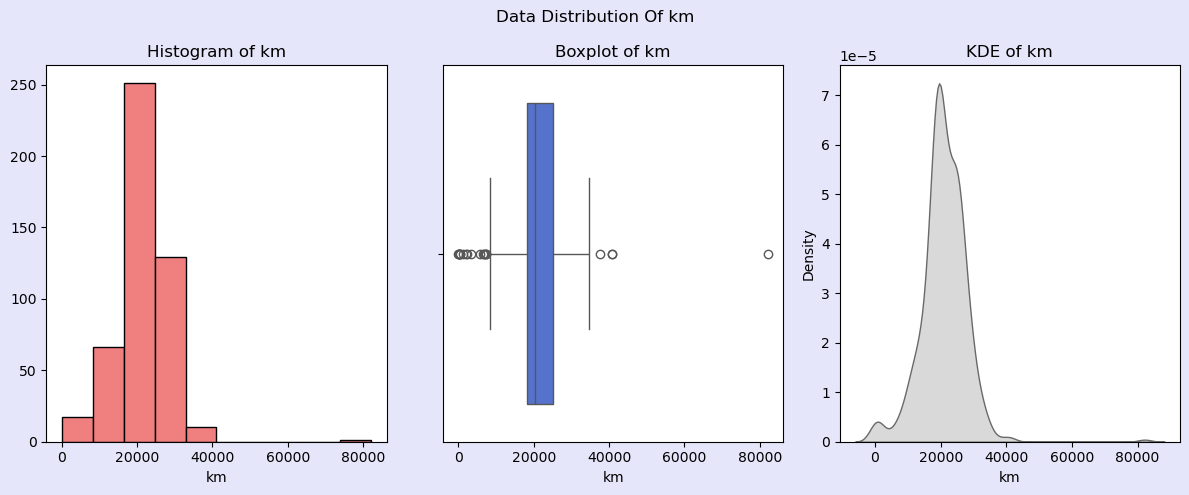

In [62]:
num_uni_analysis(df,'km')

# observations:
* 1.Most vehicles have a mileage between 15,000 – 30,000 km.
* 2.Some vehicles have very high mileage, going up to 80,000 km, and some below 5,000 km, which are considered outliers.
* 3.The distribution is right-skewed, indicating that most cars are lightly used, while a few have significantly higher mileage.

In [64]:
def num_uni_analysis(df,col):
    print("-"*10,col,"-"*10)
    print(f'Non-Visual analysis of {col} column')
    print()
    print(df[col].describe())
    print()
    print(f'Visual analysis of {col} column')

    #Visual Analysis
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), facecolor = 'lavender',alpha=0.5) 
    plt.suptitle(f'Data Distribution Of {col}')
    #-------------------------------------

    ax[0].hist(df[col] , color = 'lightcoral',edgecolor='black')  #royalblue
    ax[0].set_title(f'Histogram of {col}')
    ax[0].set_xlabel(col)

#------------------------------------
    #plt.figure(figsize = (8,8))
    #plt.subplot(1,3,1)
    sns.boxplot(data=df[col], ax=ax[1], fill=True,orient = 'h', color = 'royalblue')
    ax[1].set_title(f'Boxplot of {col}')

#------------------------------------
    #plt.figure(figsize = (8,8))
    #plt.subplot(1,3,3)
    sns.kdeplot(data=df[col], ax=ax[2], fill=True , color = 'dimgrey')
    ax[2].set_title(f'KDE of {col}')

#------------------------------------.
    plt.tight_layout()
    plt.show()

---------- cc ----------
Non-Visual analysis of cc column

count    474.000000
mean     137.229958
std       53.411679
min       11.000000
25%      109.000000
50%      124.000000
75%      149.000000
max      350.000000
Name: cc, dtype: float64

Visual analysis of cc column


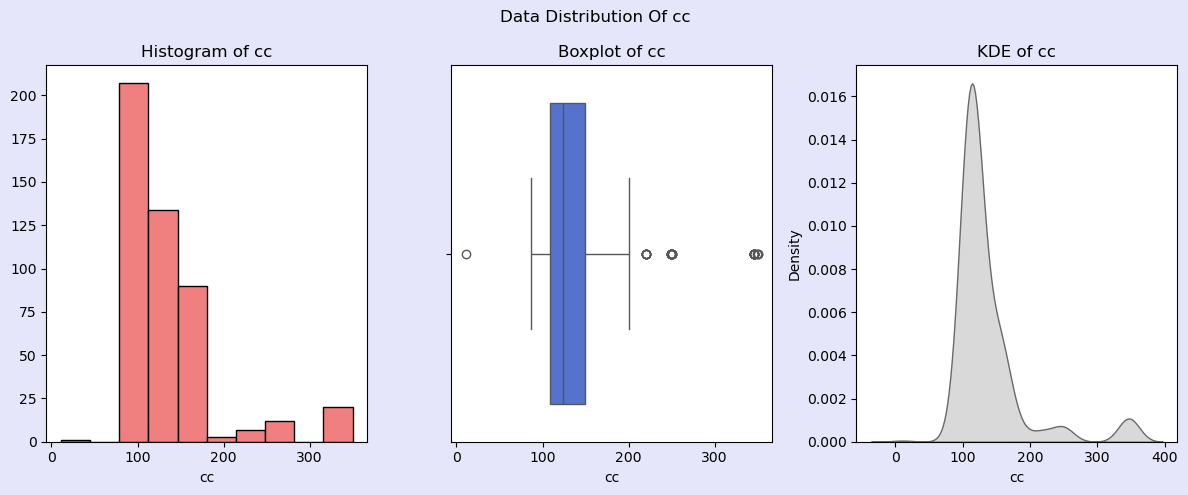

In [65]:
num_uni_analysis(df,'cc')

# observations:
* 1. Most vehicles have an engine capacity between 80 – 150 cc.
* 2. few vehicles have a very high engine capacity around 300 – 400 cc.
* 3. distribution is right-skewed, meaning most vehicles have small engine sizes, but some have much larger engines.



In [67]:
def num_uni_analysis(df,col):
    print("-"*10,col,"-"*10)
    print(f'Non-Visual analysis of {col} column')
    print()
    print(df[col].describe())
    print()
    print(f'Visual analysis of {col} column')

    #Visual Analysis
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), facecolor = 'lavender',alpha=0.5) 
    plt.suptitle(f'Data Distribution Of {col}')
    #-------------------------------------

    ax[0].hist(df[col] , color = 'lightcoral',edgecolor='black')  #royalblue
    ax[0].set_title(f'Histogram of {col}')
    ax[0].set_xlabel(col)

#------------------------------------
    #plt.figure(figsize = (8,8))
    #plt.subplot(1,3,1)
    sns.boxplot(data=df[col], ax=ax[1], fill=True,orient = 'h', color = 'royalblue')
    ax[1].set_title(f'Boxplot of {col}')

#------------------------------------
    #plt.figure(figsize = (8,8))
    #plt.subplot(1,3,3)
    sns.kdeplot(data=df[col], ax=ax[2], fill=True , color = 'dimgrey')
    ax[2].set_title(f'KDE of {col}')

#------------------------------------.
    plt.tight_layout()
    plt.show()

---------- owner ----------
Non-Visual analysis of owner column

count    474.000000
mean       1.301688
std        0.503389
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: owner, dtype: float64

Visual analysis of owner column


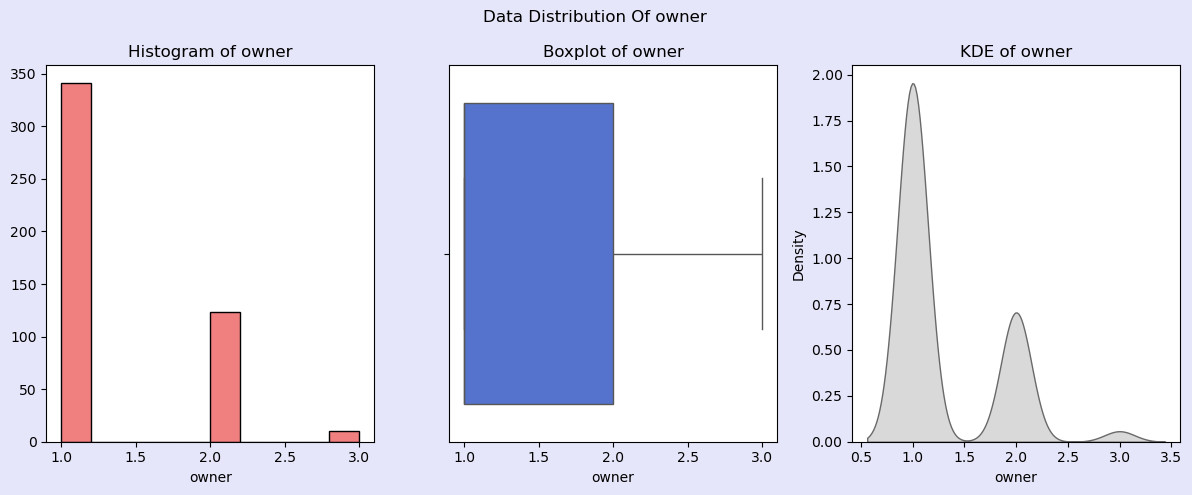

In [68]:
num_uni_analysis(df,'owner')

# observations:
1. Most vehicles are 1st owner.
2. smaller number of vehicles have had 2 owners, and very few have had 3 owners.
3. data is left-skewed, meaning majority are single-owner vehicles, with fewer multiple-owner ones.

In [70]:
def num_uni_analysis(df,col):
    print("-"*10,col,"-"*10)
    print(f'Non-Visual analysis of {col} column')
    print()
    print(df[col].describe())
    print()
    print(f'Visual analysis of {col} column')

    #Visual Analysis
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), facecolor = 'lavender',alpha=0.5) 
    plt.suptitle(f'Data Distribution Of {col}')
    #-------------------------------------

    ax[0].hist(df[col] , color = 'lightcoral',edgecolor='black')  #royalblue
    ax[0].set_title(f'Histogram of {col}')
    ax[0].set_xlabel(col)

#------------------------------------
    #plt.figure(figsize = (8,8))
    #plt.subplot(1,3,1)
    sns.boxplot(data=df[col], ax=ax[1], fill=True,orient = 'h', color = 'royalblue')
    ax[1].set_title(f'Boxplot of {col}')

#------------------------------------
    #plt.figure(figsize = (8,8))
    #plt.subplot(1,3,3)
    sns.kdeplot(data=df[col], ax=ax[2], fill=True , color = 'dimgrey')
    ax[2].set_title(f'KDE of {col}')

#------------------------------------.
    plt.tight_layout()
    plt.show()

---------- price ----------
Non-Visual analysis of price column

count    4.740000e+02
mean     8.085470e+04
std      7.240733e+04
min      3.600000e+04
25%      5.900000e+04
50%      7.099500e+04
75%      8.500000e+04
max      1.117000e+06
Name: price, dtype: float64

Visual analysis of price column


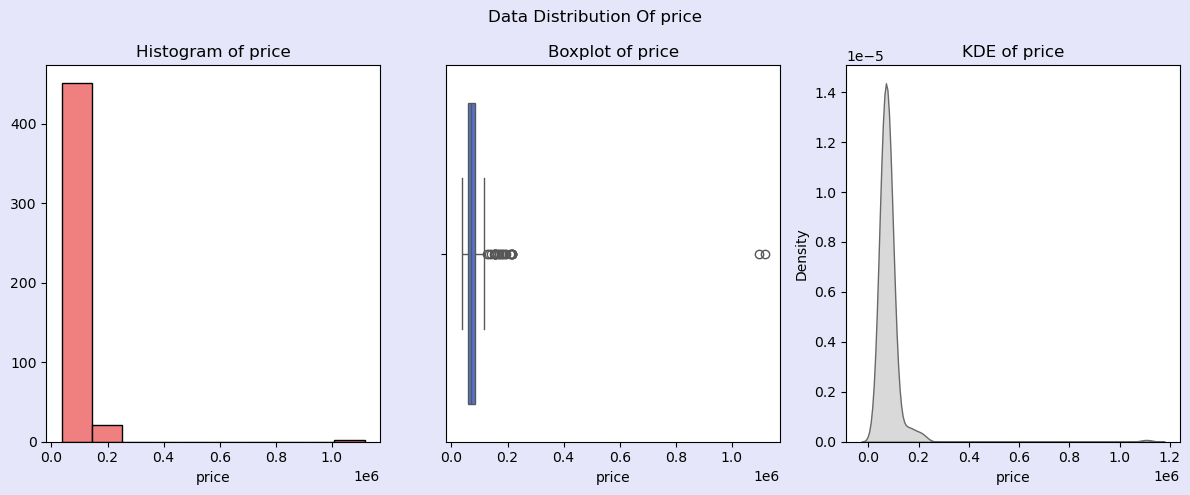

In [71]:
num_uni_analysis(df,'price')

# observations:
* 1. Most vehicles are priced in the lower range, around 0 to 2 lakh.
* 2. few cars are priced very high (up to 10–12 lakh), which are outliers compared to the majority.
* 3. price data is highly right-skewed, meaning most prices are low, and very few are very high.

In [245]:
def num_uni_analysis(df,col):
    print("-"*10,col,"-"*10)
    print(f'Non-Visual analysis of {col} column')
    print()
    print(round(df[col].describe(),2))
    print()
    print(f'Visual analysis of {col} column')

    #Visual Analysis
    plt.figure(figsize=(12,5), facecolor = 'lavender',alpha=0.5) 
    plt.suptitle(f'Data Distribution Of {col}')
    #-------------------------------------
    plt.subplot(1,3,1)
    plt.hist(df[col] , color = 'lightcoral',edgecolor='black' , bins = 5)  #royalblue
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)

#------------------------------------
    
    plt.subplot(1,3,2)
    sns.boxplot(data=df[col], fill=True,orient = 'h', color = 'royalblue')
    plt.title(f'Boxplot of {col}')

#------------------------------------
   
    plt.subplot(1,3,3)
    sns.kdeplot(data=df[col], fill=True , color = 'dimgrey')
    plt.title(f'KDE of {col}')

#------------------------------------.
    plt.tight_layout()
    plt.show()

In [247]:
round(df['original_price'].describe(),2)

count        474.00
mean       83869.47
std        72404.40
min        39000.00
25%        62000.00
50%        73995.00
75%        88000.00
max      1120000.00
Name: original_price, dtype: float64

---------- original_price ----------
Non-Visual analysis of original_price column

count        474.00
mean       83869.47
std        72404.40
min        39000.00
25%        62000.00
50%        73995.00
75%        88000.00
max      1120000.00
Name: original_price, dtype: float64

Visual analysis of original_price column


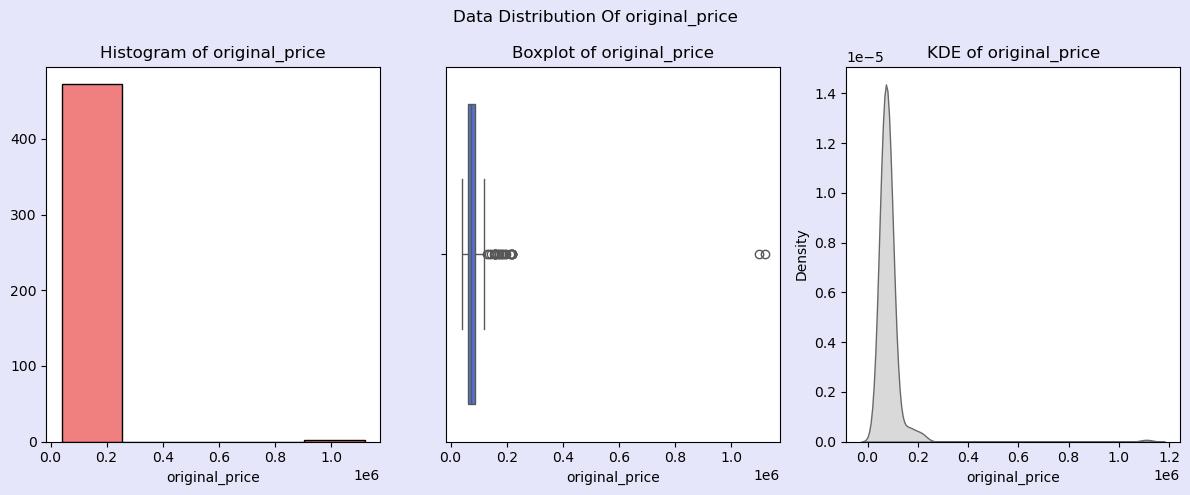

In [249]:
num_uni_analysis(df,'original_price')

## Observation :
1. Most cars had an original price between 0 to 2 lakh 
2. 
3.

## Non Visual & Visual Analysis Of Categorical Data 

#### Categorical Univariate Non Visual Analysis

In [78]:
def cat_uni_analysis(df,col):

    print("-"*10,col,"-"*10)
    print()
    print(df[col].describe())
    print()
    print('Value Counts : \n',df[col].value_counts().head(5))
    print()

#Visual Analysis
    plt.figure(figsize = (12,15))
    plt.suptitle(f'Data Distribution Of {col} column')
    print()
    print('\n')
    #-------------------------------------
    plt.subplot(3,1,1)
    sns.barplot(df[col].value_counts()[0:20], color = 'orange',)
    plt.title(f'Bar plot of {col} column')
    plt.xticks(rotation = 45)
    print('\n')
#------------------------------------
    plt.subplot(3,1,2)
    df[col].value_counts()[0:8].plot.pie(autopct = '%1.1f%%' , legend = True, pctdistance=0.7)
    plt.legend(title= col , loc="center right"    , bbox_to_anchor=(1.80, 0.5))
    plt.title(f'pie chart of {col} column')

    print('\n')
#------------------------------------
    plt.subplot(3,1,3)
    sns.countplot(x = df[col])
    plt.title(f'Count plot of {col} column')
    plt.xticks(rotation = 90)

#------------------------------------
    plt.tight_layout()
    plt.show()

In [79]:
categorical_columns= df.select_dtypes(include= ['object']).columns.tolist()
categorical_columns
 

['brand', 'model', 'year', 'location']

---------- brand ----------

count       474
unique        9
top       honda
freq        159
Name: brand, dtype: object

Value Counts : 
 brand
honda     159
tvs       107
yamaha     72
suzuki     50
hero       30
Name: count, dtype: int64










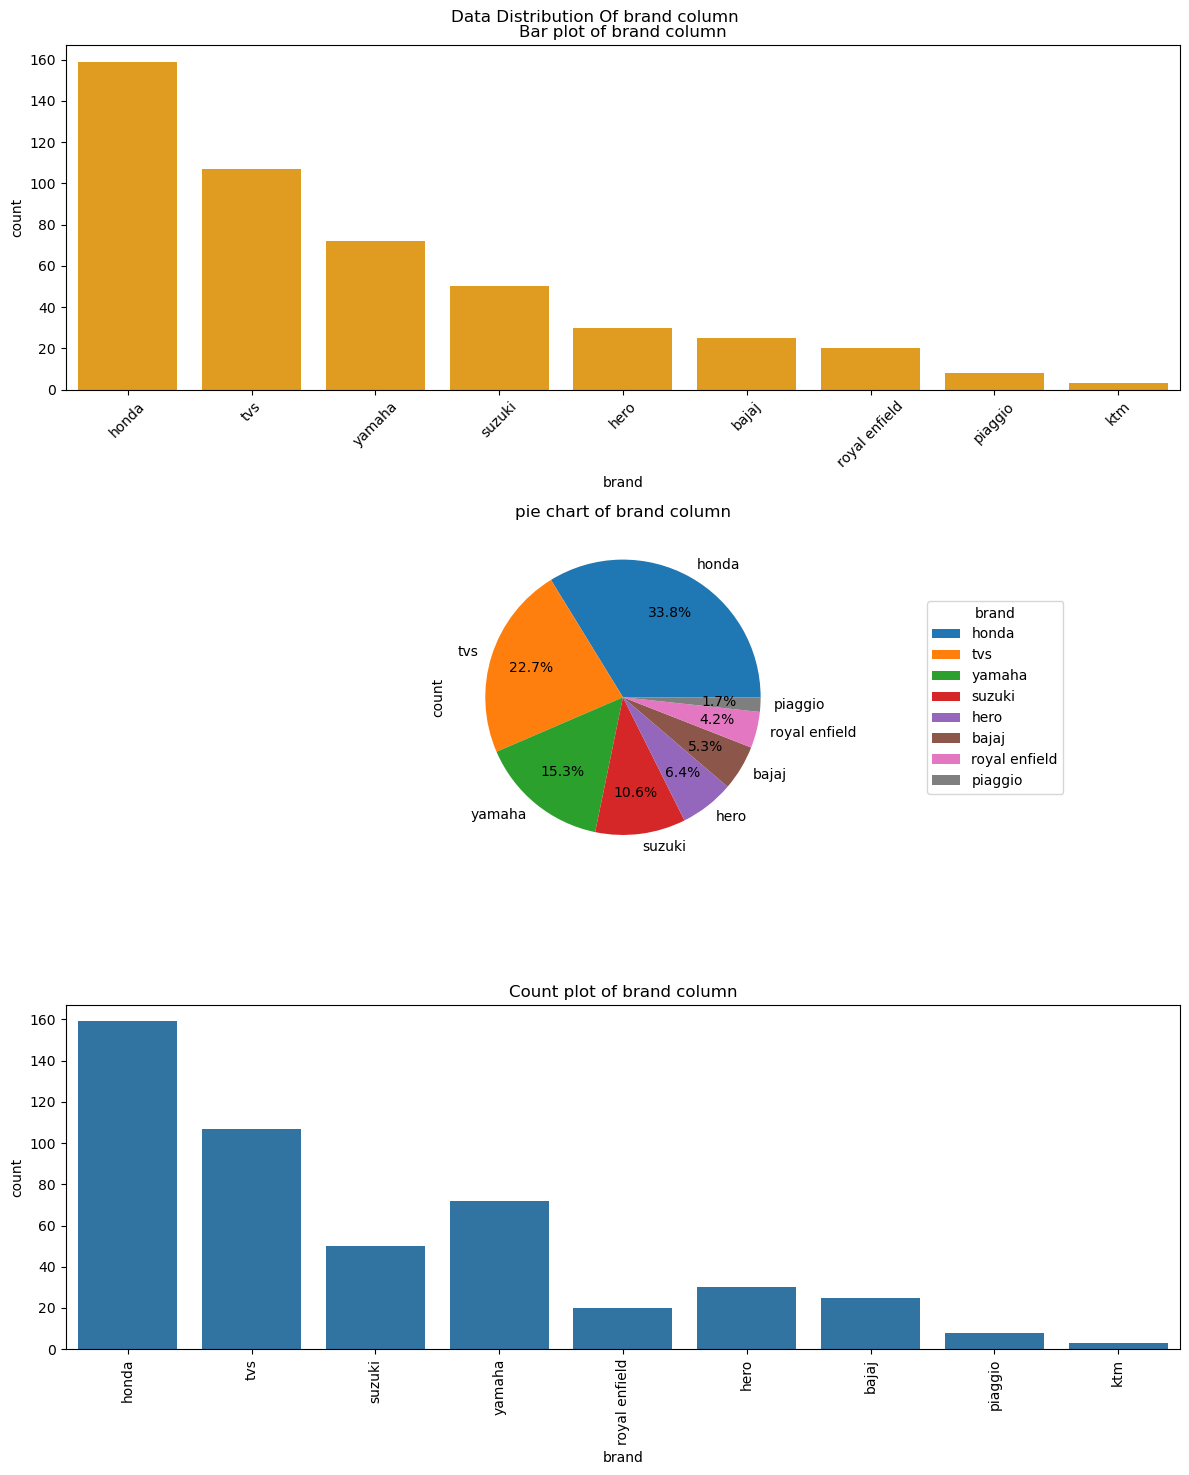

In [80]:
cat_uni_analysis(df,'brand')

In [81]:
def cat_uni_analysis(df,col):

    print("-"*10,col,"-"*10)
    print()
    print(df[col].describe())
    print()
    print('Value Counts : \n',df[col].value_counts().head(5))
    print()

#Visual Analysis
    plt.figure(figsize = (12,15))
    plt.suptitle(f'Data Distribution Of {col} column')
    print()
    print('\n')
    #-------------------------------------
    plt.subplot(3,1,1)
    sns.barplot(df[col].value_counts()[0:20], color = 'orange',)
    plt.title(f'Bar plot of {col} column')
    plt.xticks(rotation = 45)
    print('\n')
#------------------------------------
    plt.subplot(3,1,2)
    df[col].value_counts()[0:8].plot.pie(autopct = '%1.1f%%' , legend = True, pctdistance=0.7)
    plt.legend(title= col , loc="center right"    , bbox_to_anchor=(1.90, 0.5))
    plt.title(f'pie chart of {col} column')

    print('\n')
#------------------------------------
    plt.subplot(3,1,3)
    sns.countplot(x = df[col])
    plt.title(f'Count plot of {col} column')
    plt.xticks(rotation = 90)

#------------------------------------
    plt.tight_layout()
    plt.show()

---------- model ----------

count            474
unique            89
top       Activa 5G 
freq              70
Name: model, dtype: object

Value Counts : 
 model
Activa 5G       70
Access 125      49
Ntorq 125       29
Jupiter Std     29
FzS Std         18
Name: count, dtype: int64










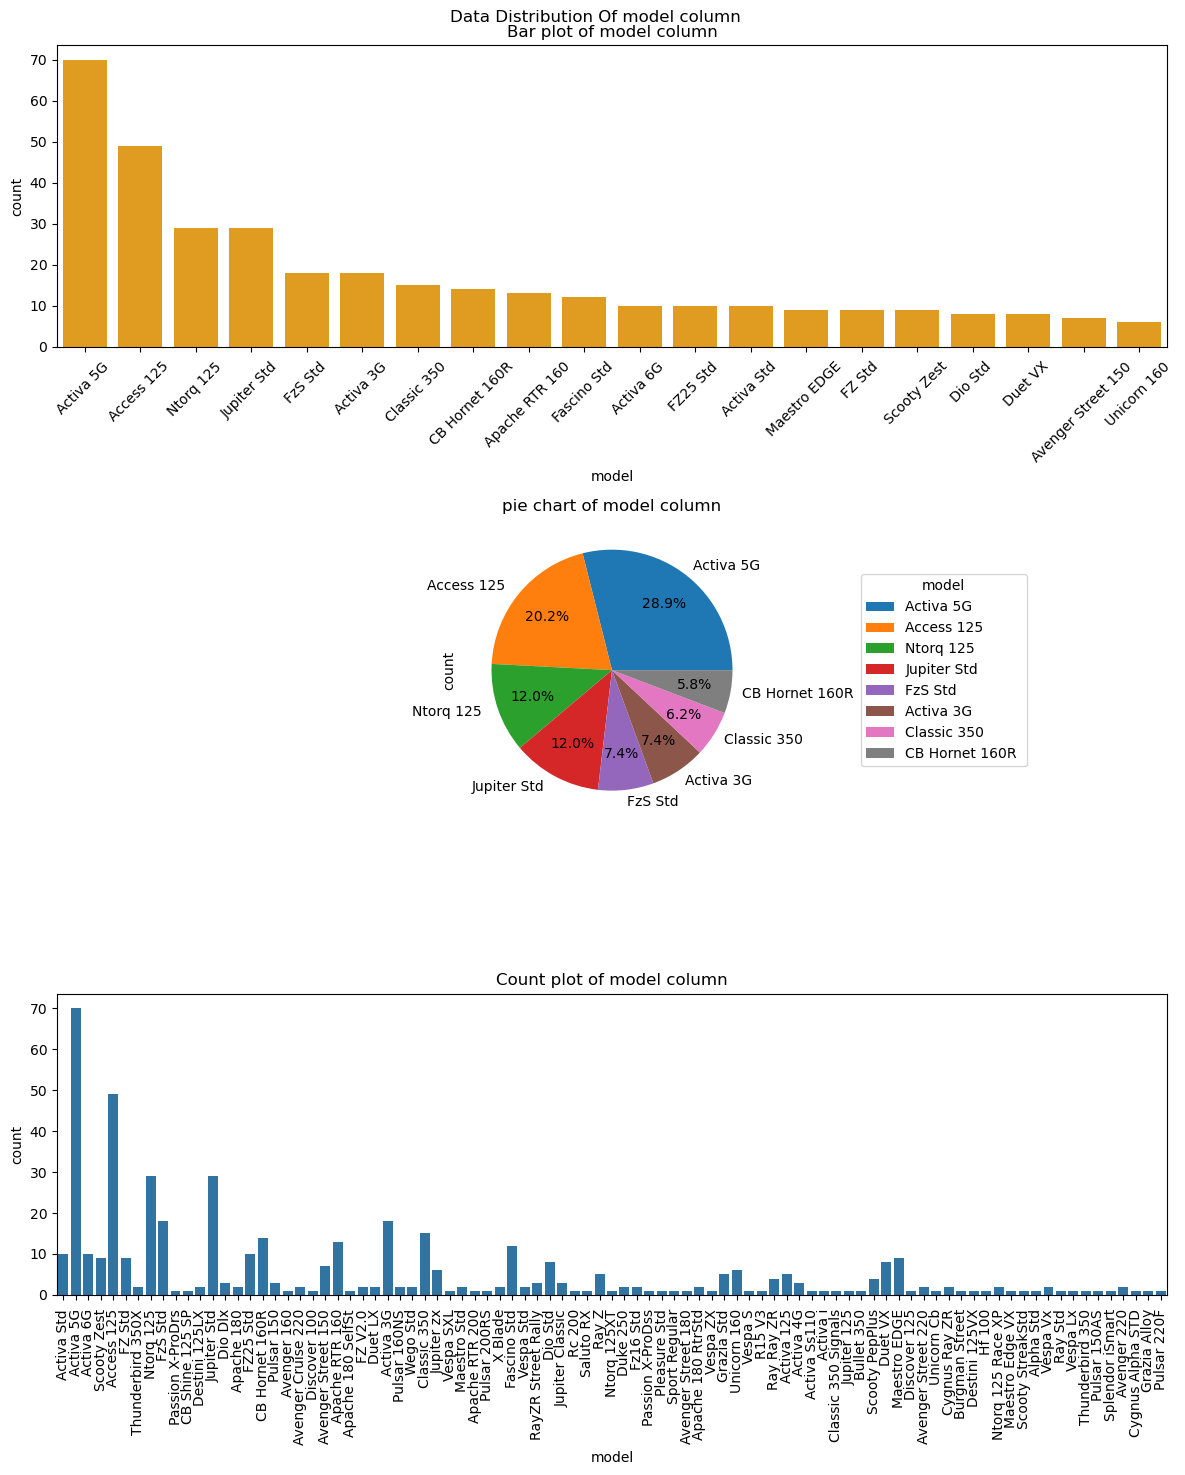

In [82]:
cat_uni_analysis(df,'model')

In [83]:
def cat_uni_analysis(df,col):

    print("-"*10,col,"-"*10)
    print()
    print(df[col].describe())
    print()
    print('Value Counts : \n',df[col].value_counts().head(5))
    print()

#Visual Analysis
    plt.figure(figsize = (12,15))
    plt.suptitle(f'Data Distribution Of {col} column')
    print()
    print('\n')
    #-------------------------------------
    plt.subplot(3,1,1)
    sns.barplot(df[col].value_counts()[0:20], color = 'orange',)
    plt.title(f'Bar plot of {col} column')
    plt.xticks(rotation = 45)
    print('\n')
#------------------------------------
    plt.subplot(3,1,2)
    df[col].value_counts()[0:8].plot.pie(autopct = '%1.1f%%' , legend = True, pctdistance=0.7)
    plt.legend(title= col , loc="center right"    , bbox_to_anchor=(1.60, 0.5))
    plt.title(f'pie chart of {col} column')

    print('\n')
#------------------------------------
    plt.subplot(3,1,3)
    sns.countplot(x = df[col])
    plt.title(f'Count plot of {col} column')
    plt.xticks(rotation = 90)

#------------------------------------
    plt.tight_layout()
    plt.show()

---------- year ----------

count      474
unique      14
top       2019
freq       118
Name: year, dtype: object

Value Counts : 
 year
2019    118
2016     72
2018     61
2017     59
2015     41
Name: count, dtype: int64










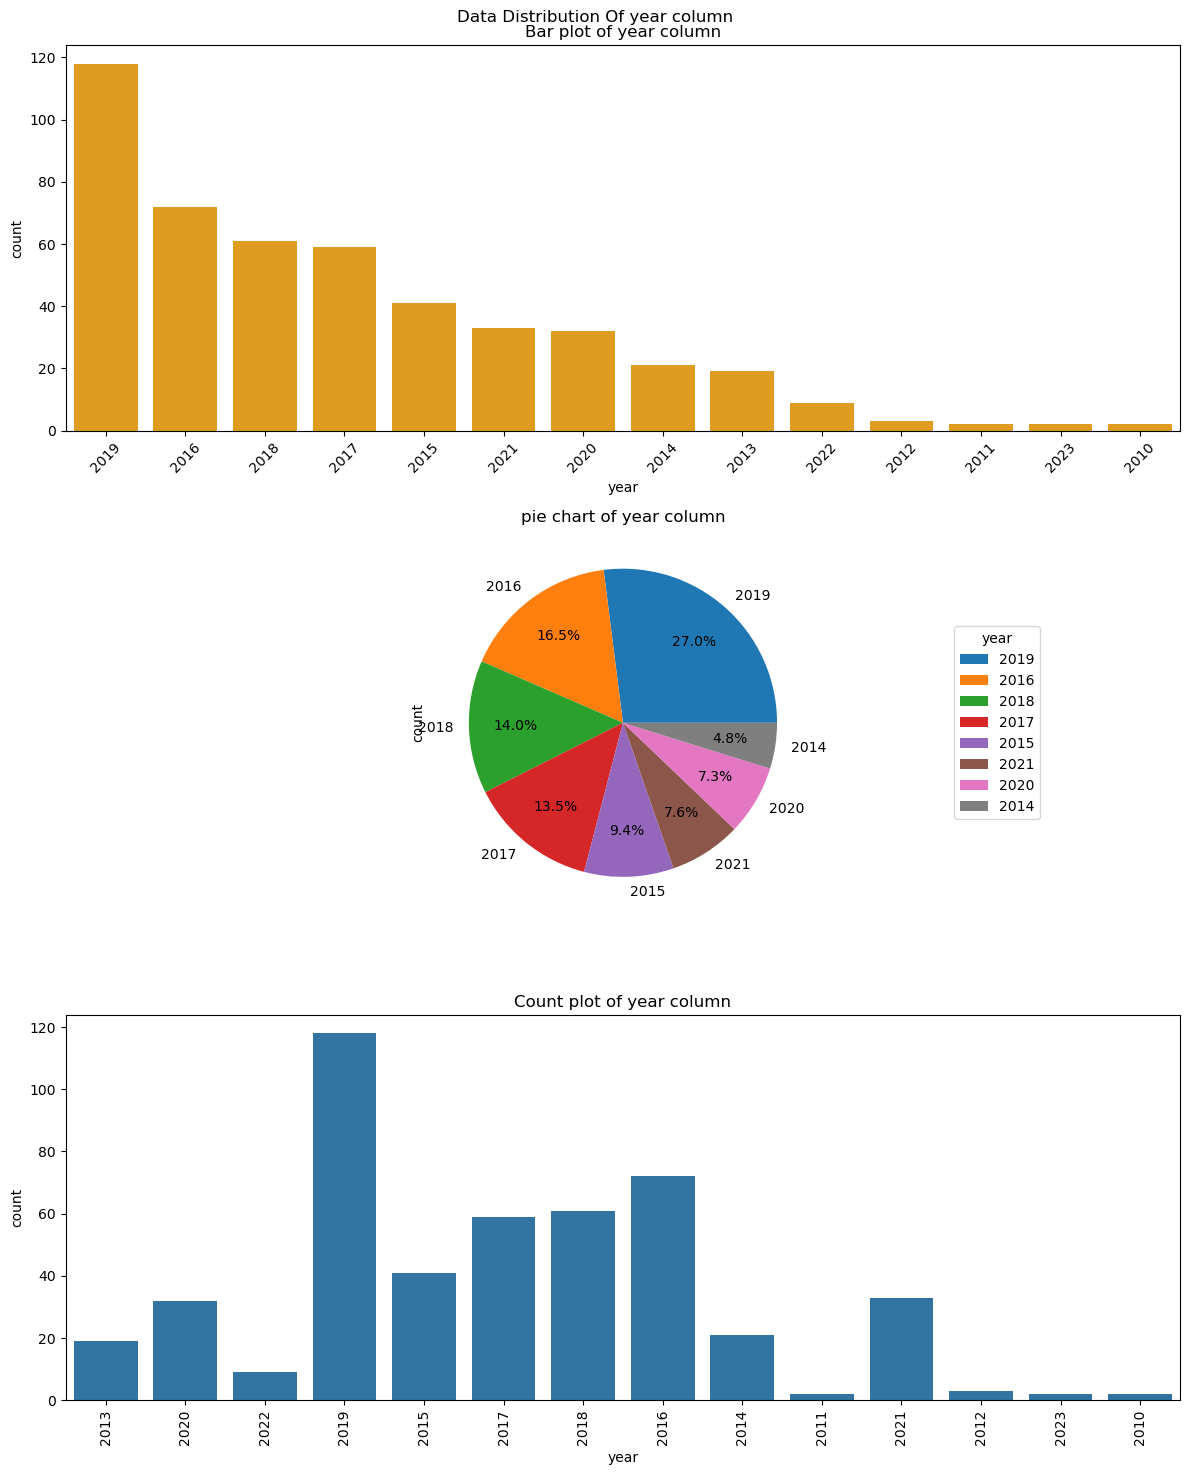

In [84]:
cat_uni_analysis(df,'year')

In [85]:
def cat_uni_analysis(df,col):

    print("-"*10,col,"-"*10)
    print()
    print(df[col].describe())
    print()
    print('Value Counts : \n',df[col].value_counts().head(5))
    print()

#Visual Analysis
    plt.figure(figsize = (12,15))
    plt.suptitle(f'Data Distribution Of {col} column')
    print()
    print('\n')
    #-------------------------------------
    plt.subplot(3,1,1)
    sns.barplot(df[col].value_counts()[0:20], color = 'orange',)
    plt.title(f'Bar plot of {col} column')
    plt.xticks(rotation = 45)
    print('\n')
#------------------------------------
    plt.subplot(3,1,2)
    df[col].value_counts()[0:5].plot.pie(autopct = '%1.1f%%' , legend = True, pctdistance=0.7)
    plt.legend(title= col , loc="center right"    , bbox_to_anchor=(1.90, 0.5))
    plt.title(f'pie chart of {col} column')

    print('\n')
#------------------------------------
    plt.subplot(3,1,3)
    sns.countplot(x = df[col])
    plt.title(f'Count plot of {col} column')
    plt.xticks(rotation = 90)

#------------------------------------
    plt.tight_layout()
    plt.show()

---------- location ----------

count            474
unique             7
top        bellandur
freq             177
Name: location, dtype: object

Value Counts : 
 location
bellandur       177
sarjapur        134
indiranagar      77
indira nagar     42
hsr layout       29
Name: count, dtype: int64










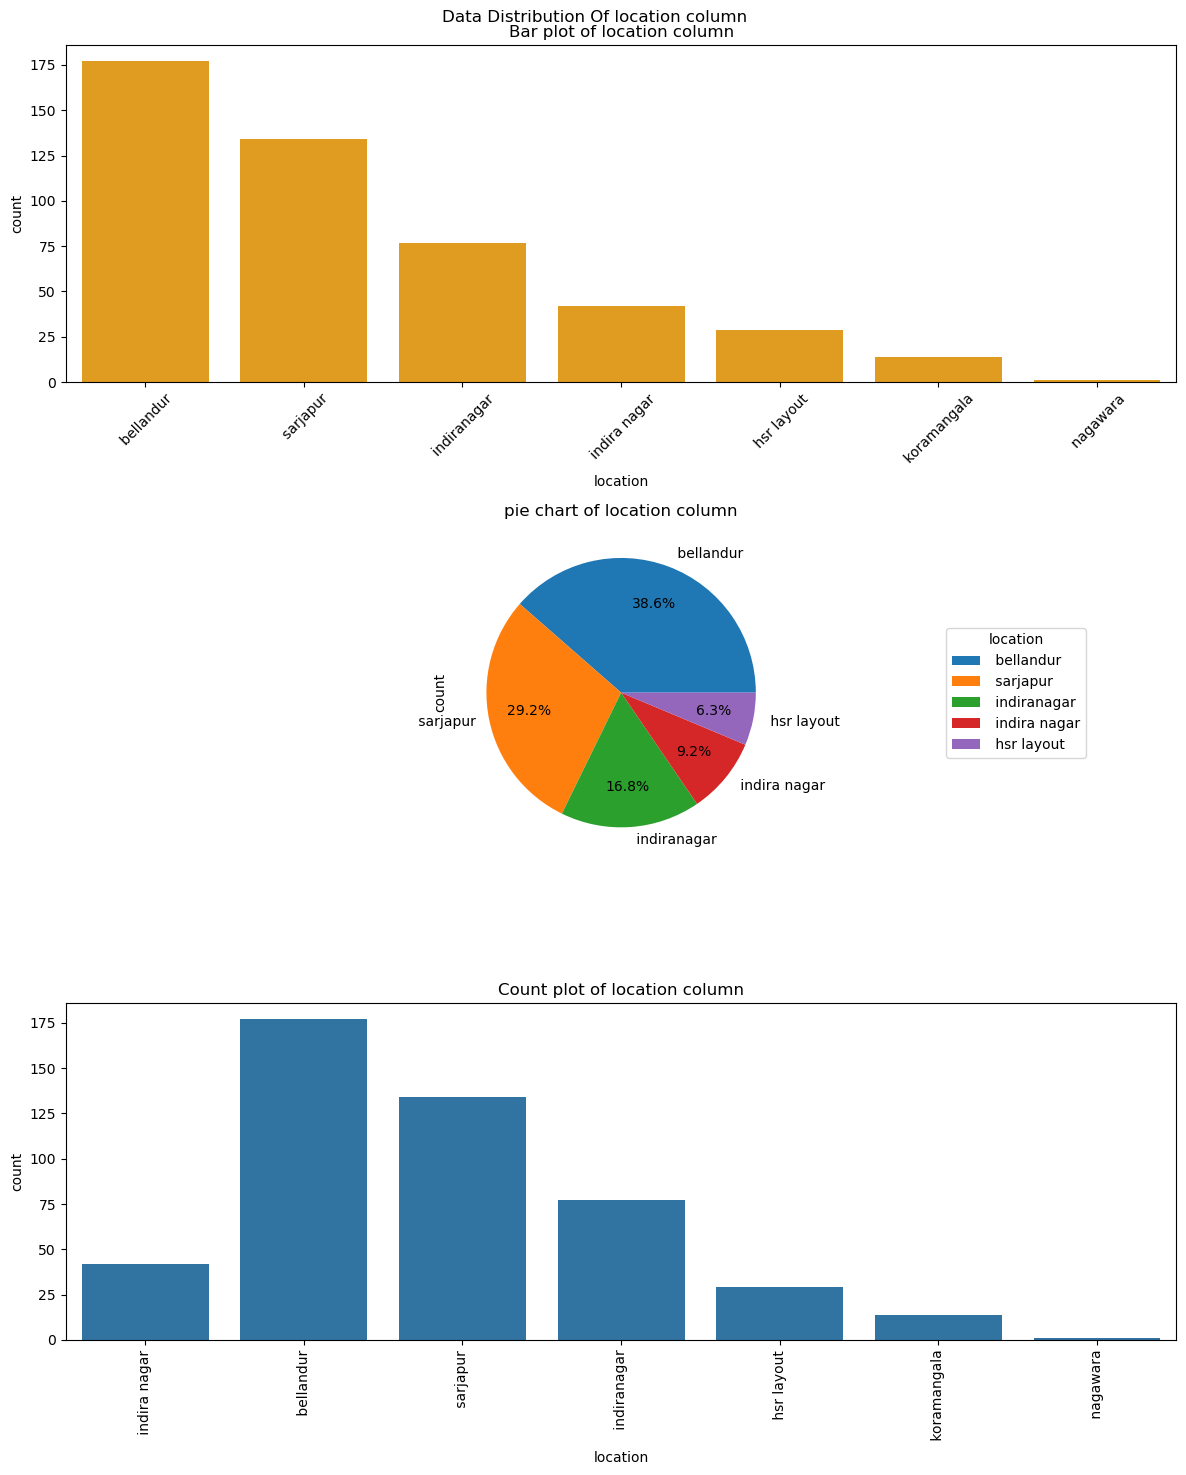

In [86]:
cat_uni_analysis(df,'location')

# Bi variate Analysis


In [88]:
df.dtypes

brand             object
model             object
year              object
km                 int64
cc                 int64
owner              int64
location          object
price              int64
original_price     int64
dtype: object

In [291]:
numerical_columns = df.select_dtypes(include = ['int64'])
numerical_columns.columns

numerical_df = df.select_dtypes(include = ['int64'])
num_cols=numerical_df.columns

<Axes: >

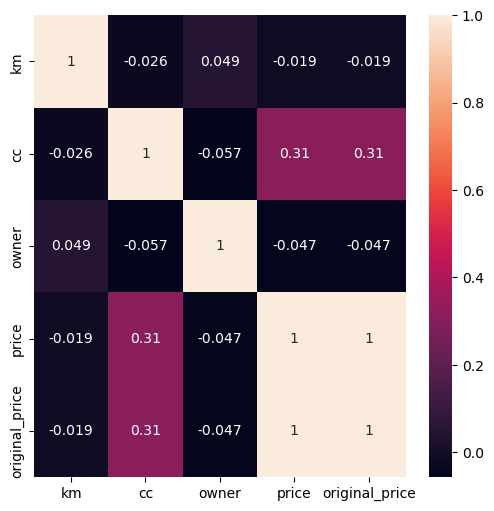

In [90]:
plt.figure(figsize=(6,6))
heatmap_data = numerical_columns.corr()
sns.heatmap(heatmap_data,annot=True)

# Bi- variate visual of Numerical Columns

In [92]:
def Bi_variate_visual(col1,col2):
    plt.figure(figsize = (12,5) , facecolor = 'salmon' ,edgecolor = 'black')
    plt.suptitle(f'Bi variate visual analysisi of {col1} vs {col2}')

    #----------------------------
    plt.subplot(1,2,1)
    plt.title(f'Bar Plot of {col1} vs {col2}')
    sns.barplot(x = col1 , y = col2, data = df , color = 'teal')
    plt.xlabel(col1)
    plt.xticks(rotation = 90)
    plt.ylabel(col2)
    plt.grid()


    #--------------------------------
    plt.subplot(1,2,2)
    plt.title(f'scatter of {col1} vs {col2}')
    sns.scatterplot(x = col1 , y = col2, data = df , markers = 'o',s = 100 , color = 'indigo')
    plt.xlabel(col1)
    plt.xticks(rotation = 90)
    plt.ylabel(col2)
    

    #---------------------------------
    plt.tight_layout()
    plt.show()
    

In [93]:
df.head()

,brand,model,year,km,cc,owner,location,price,original_price
0,honda,Activa Std,2013,26008,109,1,indira nagar,55000,58000
1,honda,Activa 5G,2020,15036,109,2,indira nagar,83000,86000
2,honda,Activa 6G,2022,11918,109,1,indira nagar,93000,96000
3,honda,Activa 5G,2019,10647,109,1,indira nagar,77000,80000
4,honda,Activa 5G,2019,28508,109,2,indira nagar,77000,80000


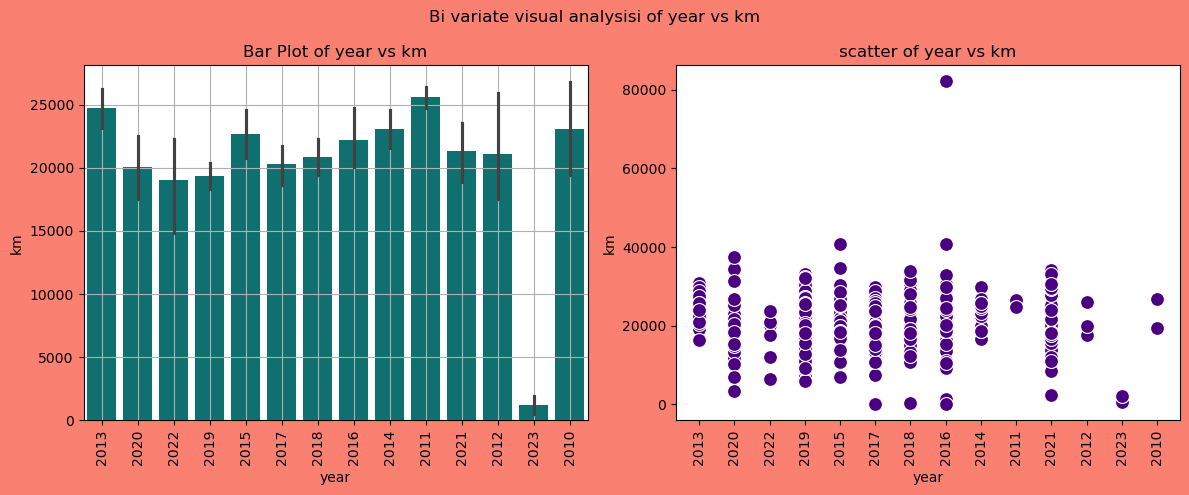

In [94]:
Bi_variate_visual("year","km")

# observations:
1. Older bikes (2010–2015) have higher average kilometers driven.
2.Newer bikes (2020–2023) have lower kilometers, especially 2023 cars.
3.Most bikes across all years have kilometers between 15,000 and 30,000 km.



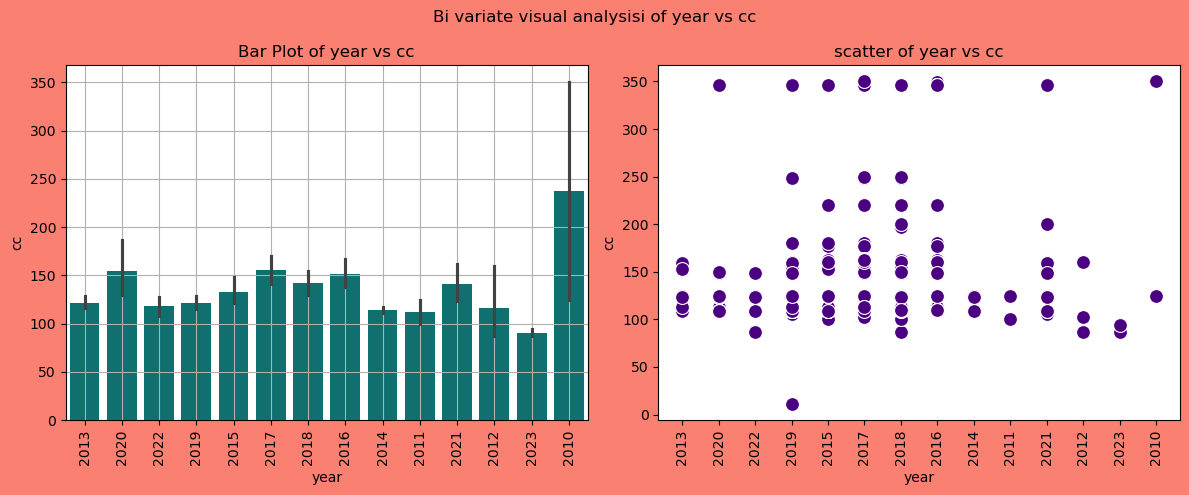

In [95]:
Bi_variate_visual("year","cc")

# Observation:
1.Most bikes across the years have engine sizes between 100cc to 160cc.  
2.Older bikes (2010) have higher average cc, with some engines going up to 350cc.
3.Newer bikes (2020–2023) mostly have smaller cc values (below 150cc).

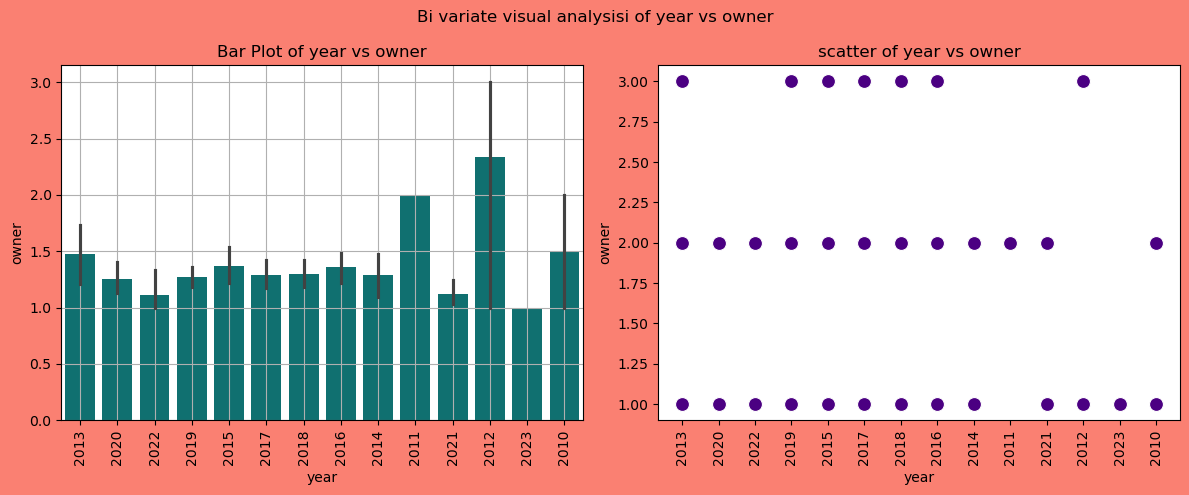

In [96]:
Bi_variate_visual("year","owner")

# Observation:
1.Most bikes have had only 1 or 2 owners across all years.
2.Older bikes (2010-2012) show a few cars with 3 owners.
3.Newer bikes (2020-2023) mostly have only 1 owner, meaning they are less used.

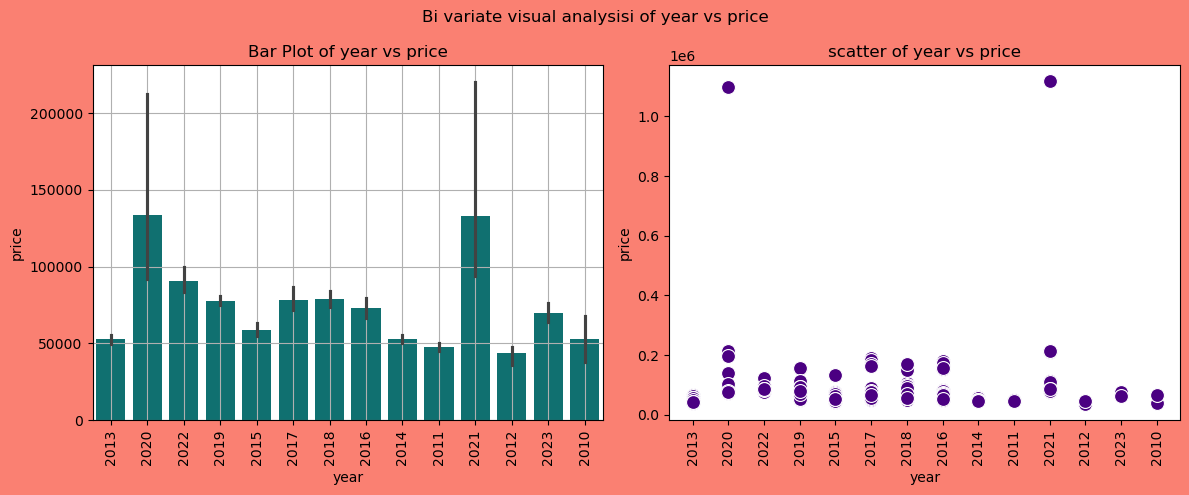

In [97]:
Bi_variate_visual("year","price")

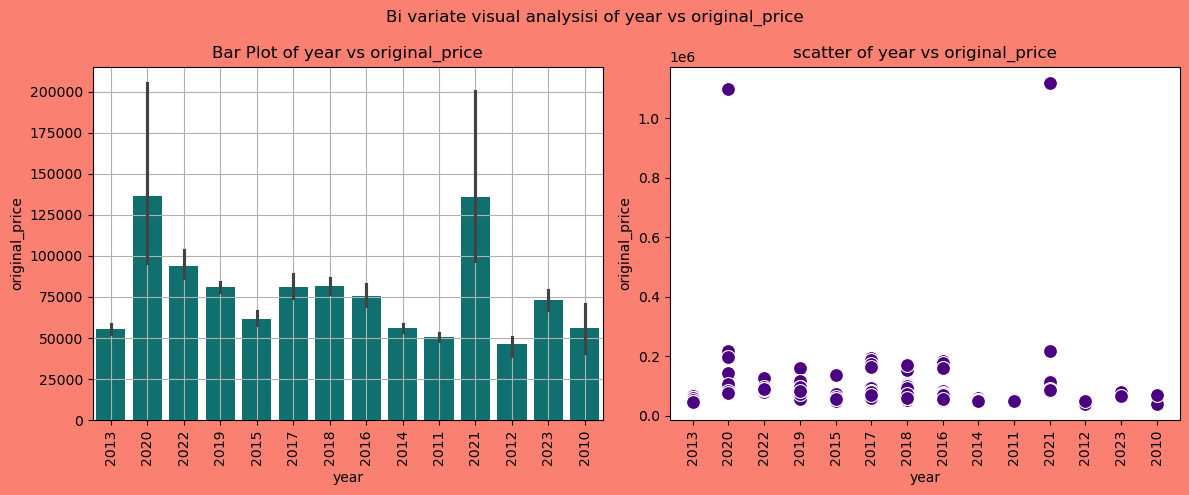

In [98]:
Bi_variate_visual("year","original_price")

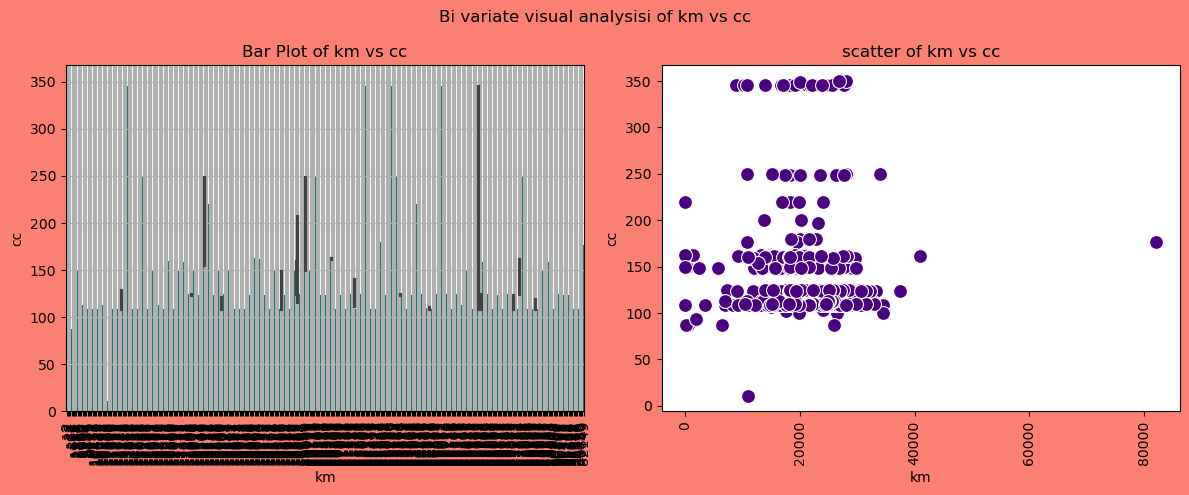

In [99]:
Bi_variate_visual("km","cc")

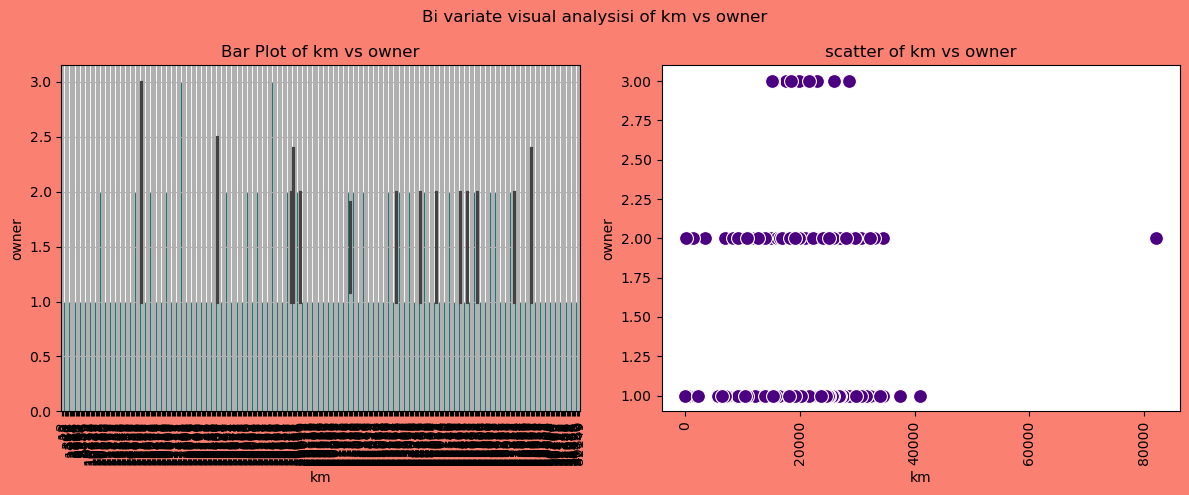

In [100]:
Bi_variate_visual("km","owner")

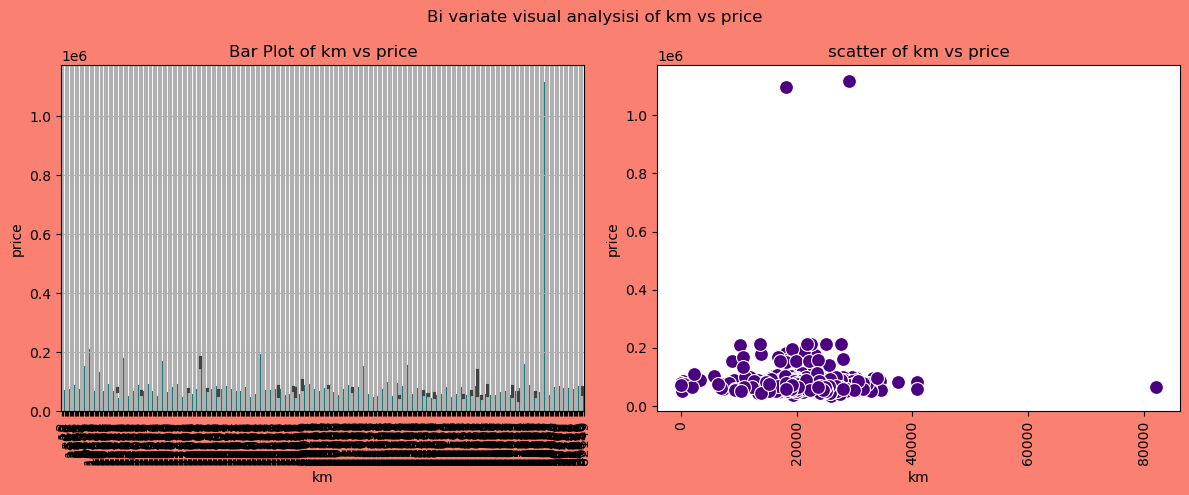

In [101]:
Bi_variate_visual("km","price")

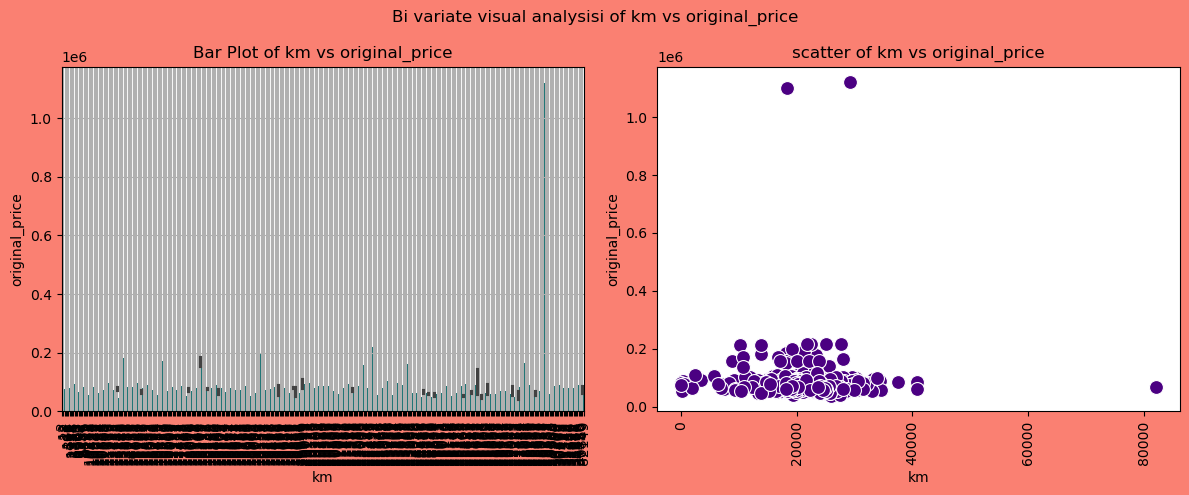

In [102]:
Bi_variate_visual("km","original_price")

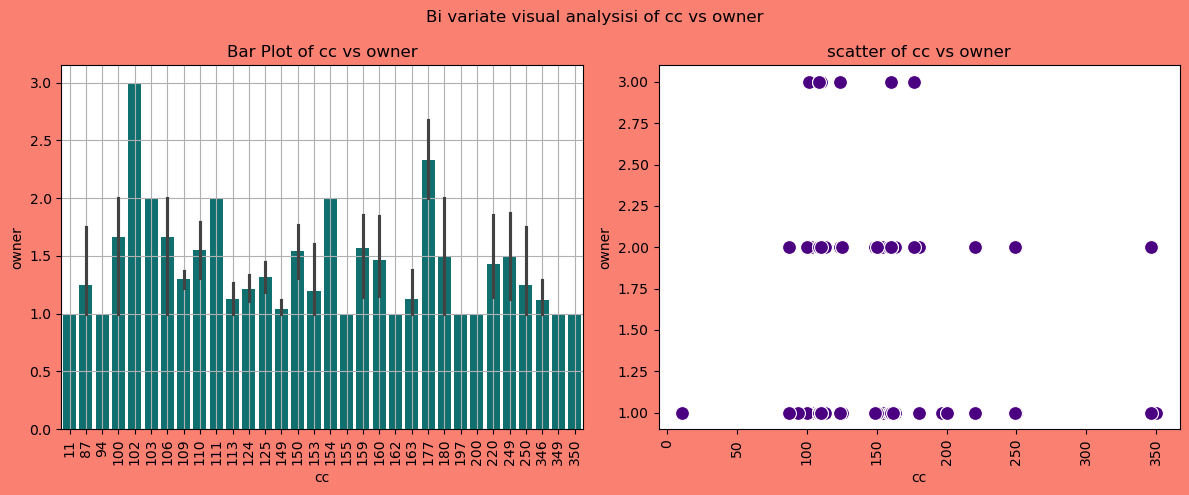

In [103]:
Bi_variate_visual("cc","owner")

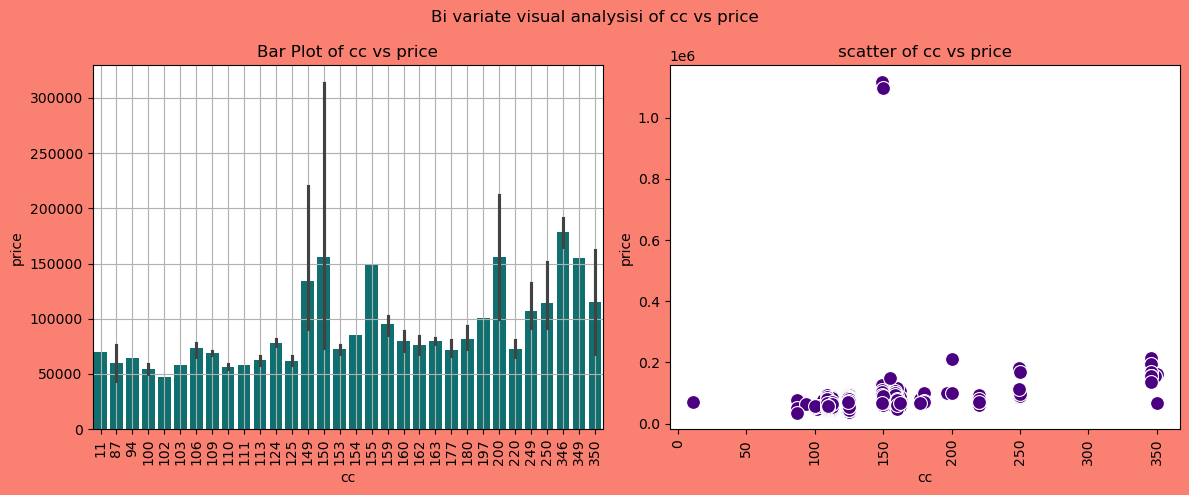

In [104]:
Bi_variate_visual("cc","price")

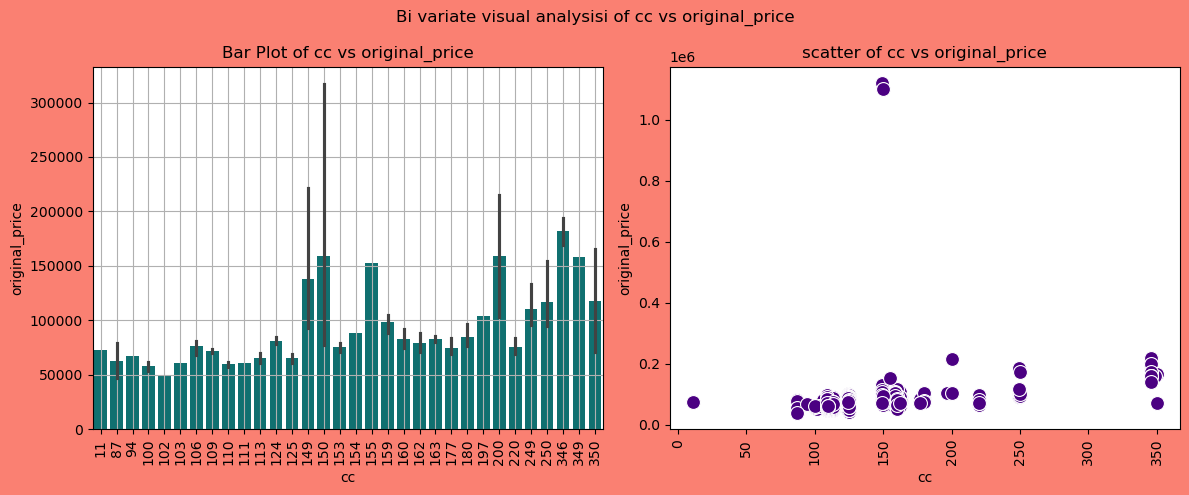

In [105]:
Bi_variate_visual("cc","original_price")

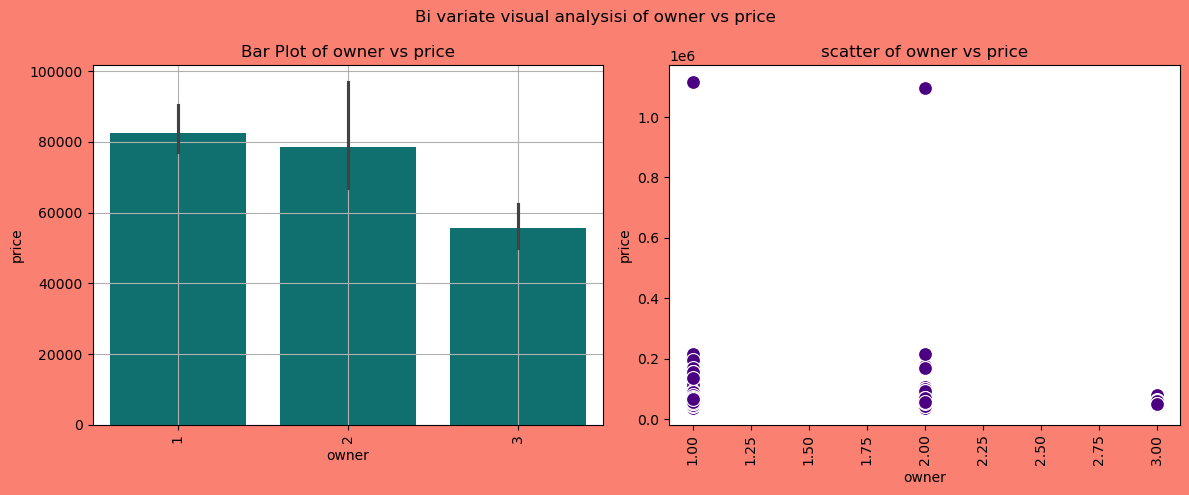

In [106]:
Bi_variate_visual("owner","price")

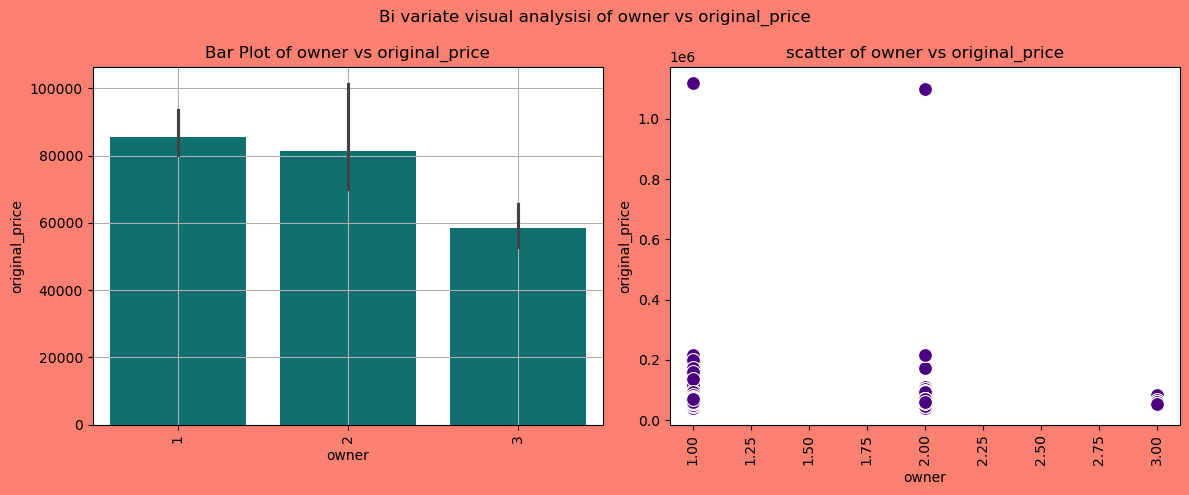

In [107]:
Bi_variate_visual("owner","original_price")

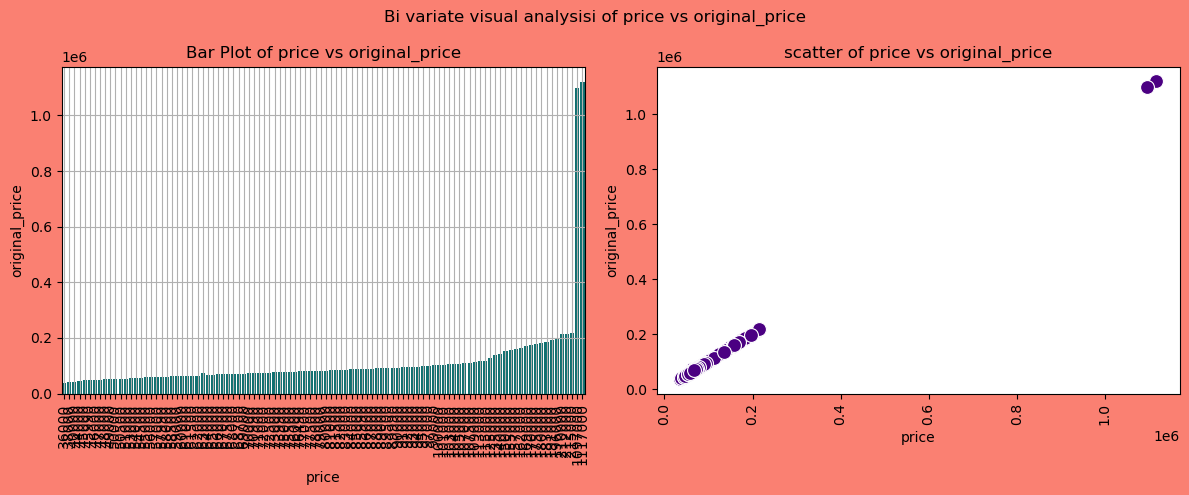

In [108]:
Bi_variate_visual("price","original_price")

# Bi- variate visual of categorical Columns

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def cat_n_cat(df, column1, column2, head=10): ## head to get the most frqeuent cat
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(data[column1], data[column2])
    
    top_values = contingency_table.sum(axis=1).nlargest(head).index
    contingency_table = contingency_table.loc[top_values]
    
    contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100 # Convert contingency table to percentages
    print(contingency_table_percent)
    plt.figure(figsize=(15, 6))
    
    # Bar plot 
    plt.subplot(1, 2, 1)
    sns.barplot(data=contingency_table_percent.T, orient='h')
    plt.xlabel('Percentage')
    plt.ylabel(f'{column1}')
    plt.title(f'Top {head} Categories in {column1} vs {column2}')
    
    # Heatmap of the percentages
    plt.subplot(1, 2, 2)
    sns.heatmap(contingency_table_percent, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Percentage'})
    plt.xlabel(f'{column2}')
    plt.ylabel(f'{column1}')
    plt.title(f'Heatmap of {column1} vs {column2}')
    plt.show()


col_0          Access 125   Activa 125   Activa 3G   Activa 4G   Activa 5G   \
row_0                                                                         
Honda                  0.0     3.144654   11.320755    1.886792   44.025157   
TVS                    0.0     0.000000    0.000000    0.000000    0.000000   
Yamaha                 0.0     0.000000    0.000000    0.000000    0.000000   
Suzuki                98.0     0.000000    0.000000    0.000000    0.000000   
Hero                   0.0     0.000000    0.000000    0.000000    0.000000   
Bajaj                  0.0     0.000000    0.000000    0.000000    0.000000   
Royal Enfield          0.0     0.000000    0.000000    0.000000    0.000000   
Piaggio                0.0     0.000000    0.000000    0.000000    0.000000   
KTM                    0.0     0.000000    0.000000    0.000000    0.000000   

col_0          Activa 6G   Activa Ss110   Activa Std   Activa i   Alpha Std   \
row_0                                             

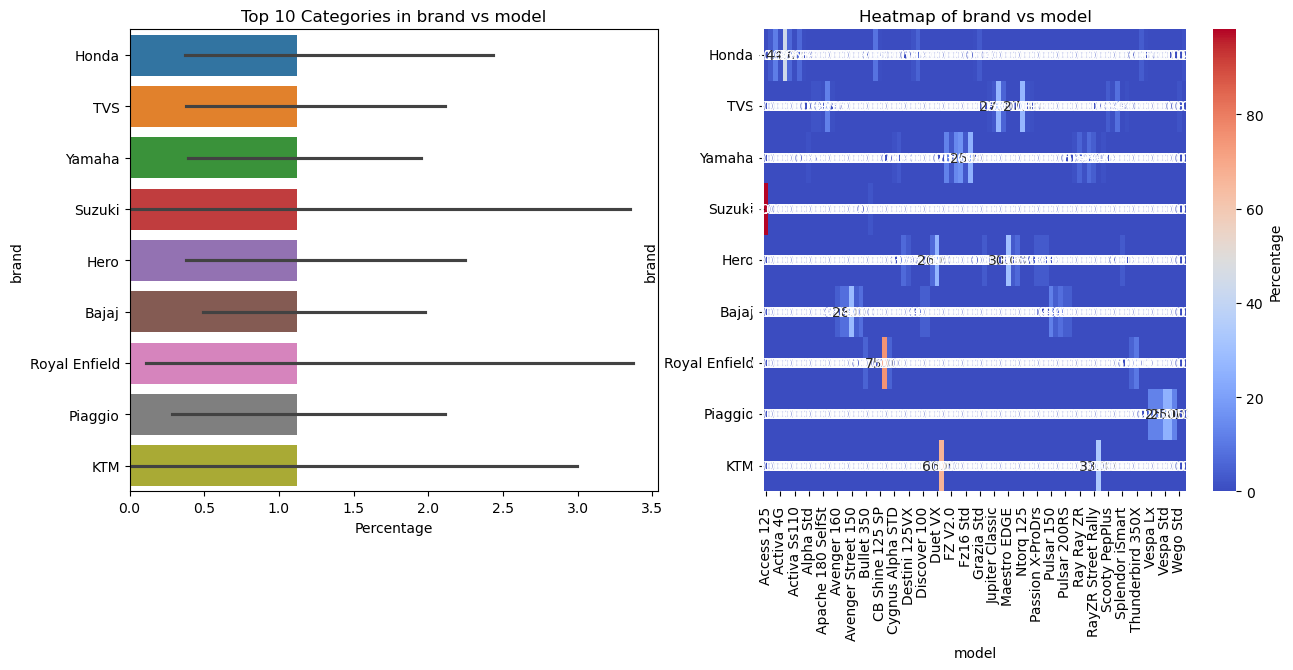

In [262]:
cat_n_cat(df,'brand','model')

col_0          2010  2011      2012       2013       2014       2015  \
row_0                                                                  
Honda           0.0   0.0  0.000000   2.515723   4.402516   6.918239   
TVS             0.0   0.0  1.869159   1.869159   5.607477   7.476636   
Yamaha          0.0   0.0  0.000000   4.166667   0.000000   6.944444   
Suzuki          2.0   2.0  0.000000  18.000000  14.000000  22.000000   
Hero            0.0   0.0  3.333333   3.333333   3.333333   3.333333   
Bajaj           0.0   4.0  0.000000   0.000000   0.000000   8.000000   
Royal Enfield   5.0   0.0  0.000000   0.000000   0.000000   5.000000   
Piaggio         0.0   0.0  0.000000   0.000000   0.000000  25.000000   
KTM             0.0   0.0  0.000000   0.000000   0.000000   0.000000   

col_0               2016       2017       2018       2019       2020  \
row_0                                                                  
Honda          12.578616   9.433962   6.918239  43.396226   7.5

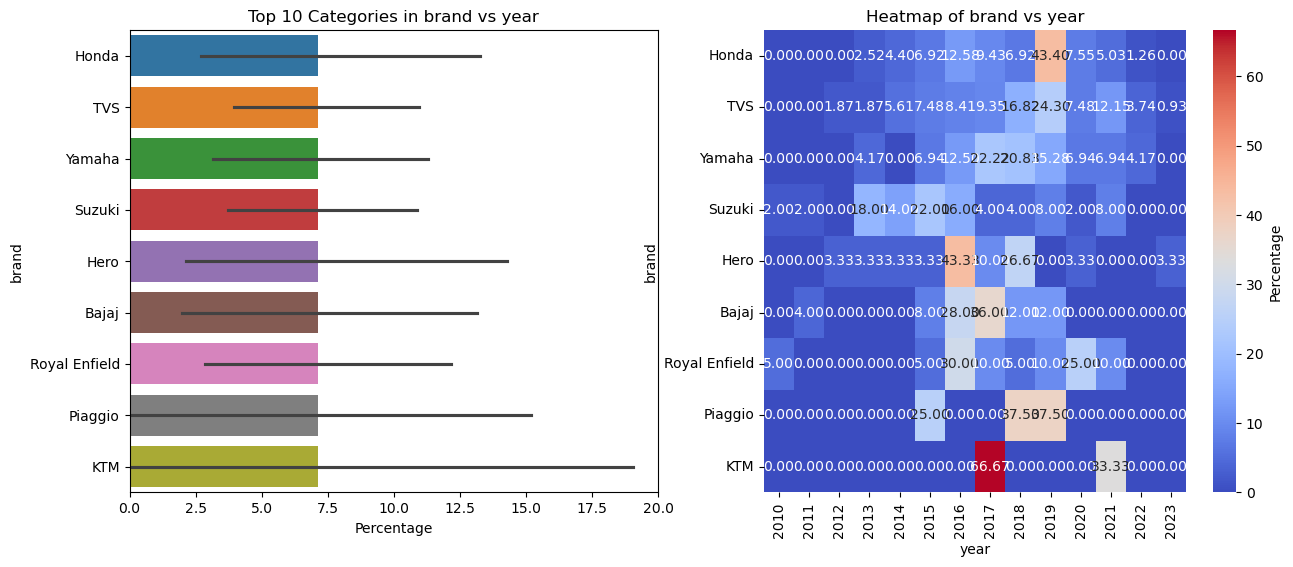

In [264]:
cat_n_cat(df,'brand','year')

In [266]:
['brand', 'model', 'year', 'location']

['brand', 'model', 'year', 'location']

col_0           Bellandur,Bangalore   HSR Layout,Bangalore  \
row_0                                                        
Honda                     35.220126               8.805031   
TVS                       27.102804               1.869159   
Yamaha                    34.722222               1.388889   
Suzuki                    18.000000               6.000000   
Hero                       6.666667               6.666667   
Bajaj                     16.000000               0.000000   
Royal Enfield             35.000000               5.000000   
Piaggio                   62.500000               0.000000   
KTM                       66.666667               0.000000   

col_0           Indira Nagar,Bangalore   Indiranagar,Bangalore  \
row_0                                                            
Honda                         6.918239                9.433962   
TVS                           2.803738               13.084112   
Yamaha                        4.166667               

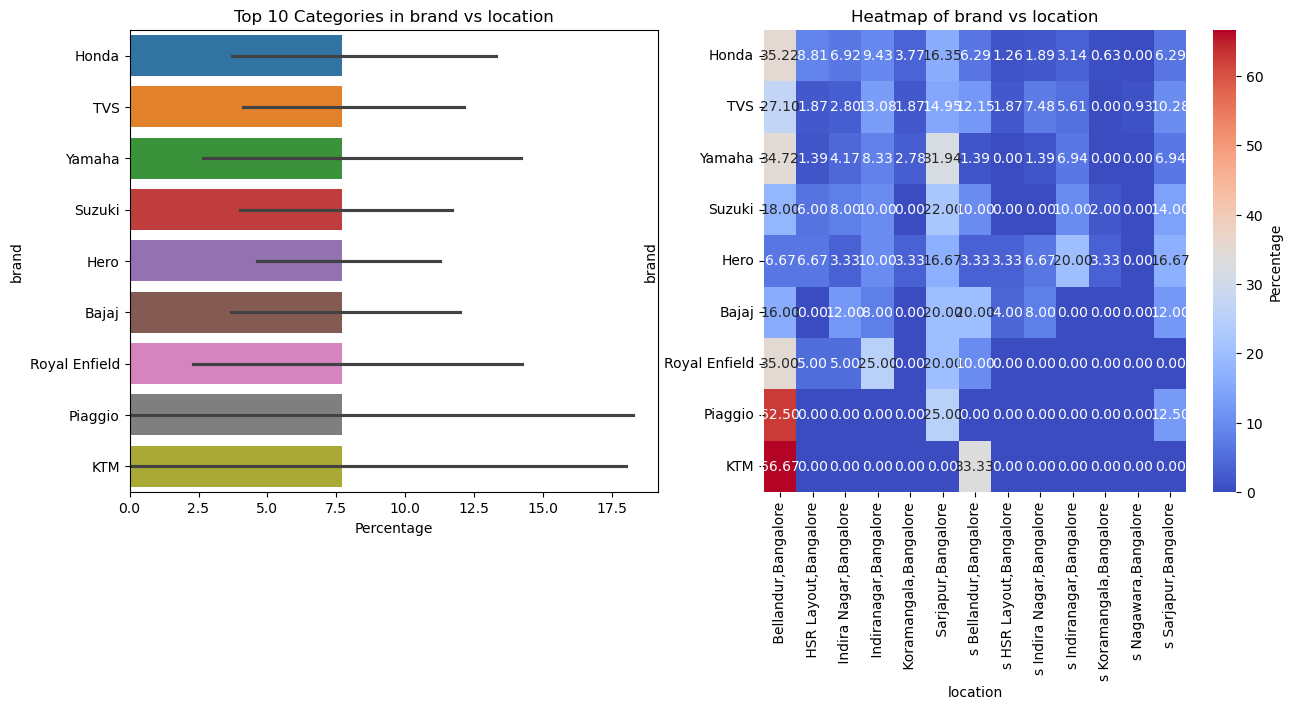

In [268]:
cat_n_cat(df,'brand','location')

col_0                2010      2011      2012       2013       2014  \
row_0                                                                 
Activa 5G        0.000000  0.000000  0.000000   0.000000   0.000000   
Access 125       2.040816  2.040816  0.000000  18.367347  14.285714   
Jupiter Std      0.000000  0.000000  0.000000   0.000000  17.241379   
Ntorq 125        0.000000  0.000000  0.000000   0.000000   0.000000   
Activa 3G        0.000000  0.000000  0.000000   0.000000   0.000000   
FzS Std          0.000000  0.000000  0.000000   0.000000   0.000000   
Classic 350      0.000000  0.000000  0.000000   0.000000   0.000000   
CB Hornet 160R   0.000000  0.000000  0.000000   0.000000   0.000000   
Apache RTR 160   0.000000  0.000000  7.692308   7.692308   0.000000   
Fascino Std      0.000000  0.000000  0.000000   0.000000   0.000000   

col_0                 2015       2016       2017       2018       2019  \
row_0                                                                    

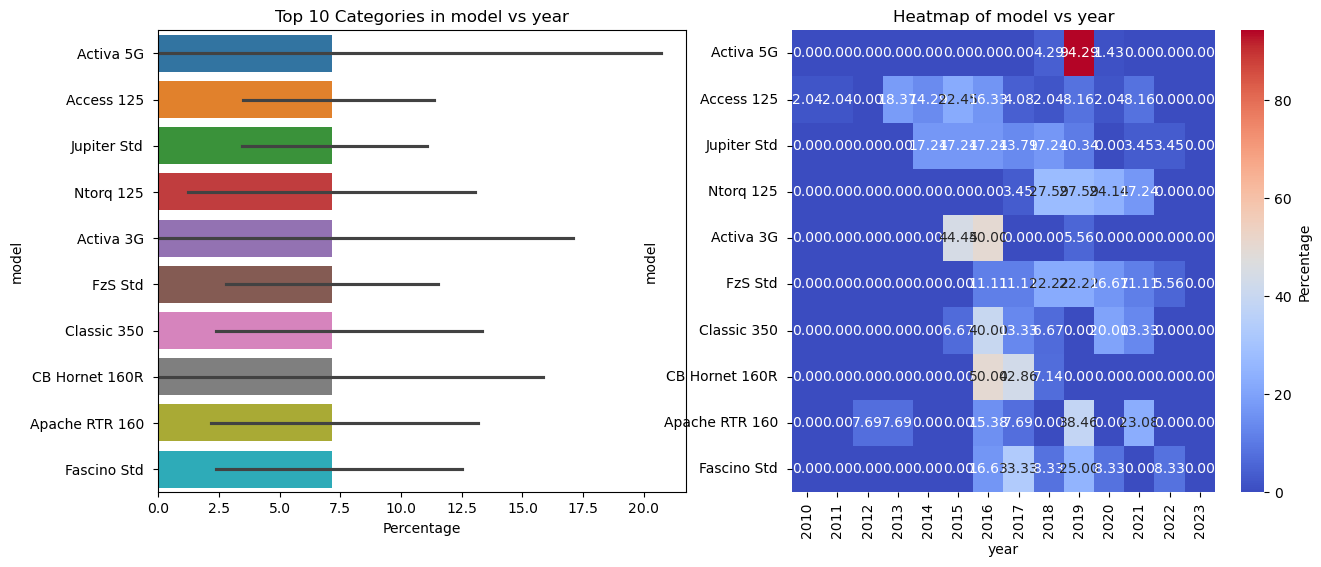

In [270]:
cat_n_cat(df,'model','year')

col_0             Bellandur,Bangalore   HSR Layout,Bangalore  \
row_0                                                          
Activa 5G                   40.000000              12.857143   
Access 125                  18.367347               6.122449   
Jupiter Std                 17.241379               3.448276   
Ntorq 125                   37.931034               3.448276   
Activa 3G                   33.333333               0.000000   
FzS Std                     38.888889               5.555556   
Classic 350                 40.000000               6.666667   
CB Hornet 160R              57.142857              21.428571   
Apache RTR 160              23.076923               0.000000   
Fascino Std                 25.000000               0.000000   

col_0             Indira Nagar,Bangalore   Indiranagar,Bangalore  \
row_0                                                              
Activa 5G                       8.571429                1.428571   
Access 125                 

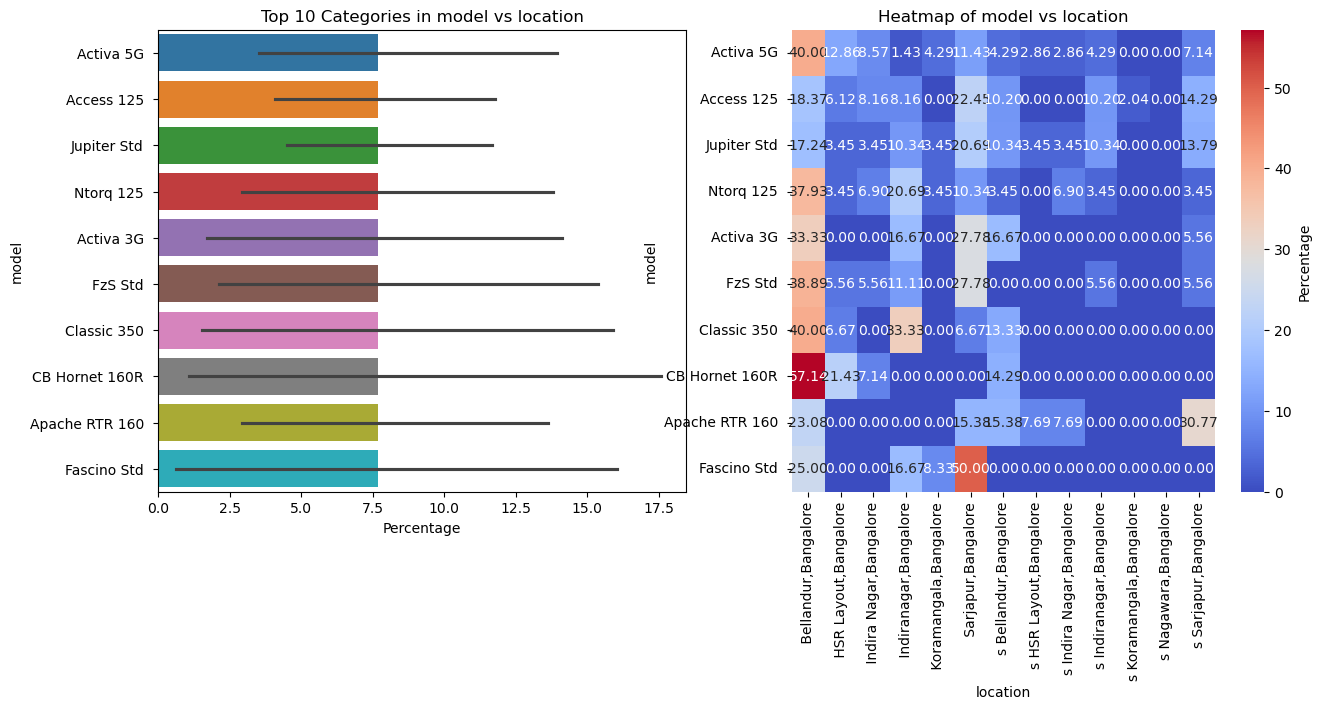

In [272]:
cat_n_cat(df,'model','location')

col_0   Bellandur,Bangalore   HSR Layout,Bangalore   Indira Nagar,Bangalore  \
row_0                                                                         
2019              35.772358               8.130081                 9.756098   
2016              26.027397               2.739726                 4.109589   
2017              22.222222               3.174603                 4.761905   
2018              26.984127               4.761905                 1.587302   
2015              20.454545               6.818182                 2.272727   
2021              42.857143               5.714286                 0.000000   
2020              32.352941               2.941176                 8.823529   
2013              33.333333               0.000000                14.285714   
2014              38.095238               0.000000                 4.761905   
2022              20.000000               0.000000                10.000000   

col_0   Indiranagar,Bangalore   Koramangala,Bangalo

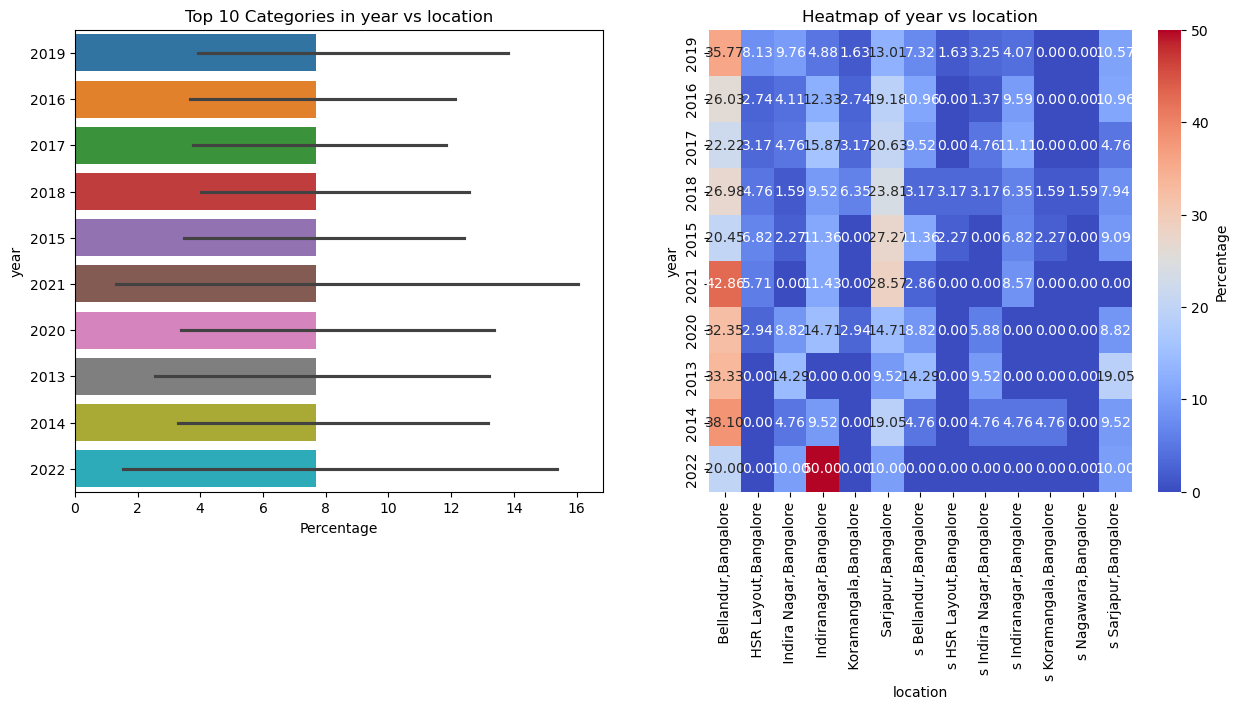

In [274]:
cat_n_cat(df,'year','location')

# Bi-variate analysis categical vs numerical

In [342]:
def cat_num(df, categorical_columns, numerical_columns, head_value= 10):
    if head_value:
        top_categories = df[categorical_columns].value_counts(normalize= True).head(head_value).index.tolist()
        dataframe = df[df[categorical_columns].isin(top_categories)]
        #loop over numerical columns
    for num in numerical_columns:
        group_data= dataframe.groupby(categorical_columns)[num].agg(['mean','median','min','max'])
        print(group_data)
        ##plot
        plt.figure(figsize= (15,15))
        plt.subplot(2,2,1)
        #bar plot
        sns.barplot(data= dataframe,y=categorical_columns, x= num,color='purple')
        plt.title('Bar plot')
        #box plot
        plt.subplot(2,2,2)
        sns.boxplot(y=categorical_columns,x= num, data= dataframe,color='red')
        plt.title('BOX plot')
        ## violin plot
        plt.subplot(2,2,3)
        sns.violinplot(y=categorical_columns, x= num, data= dataframe,color='pink')
        plt.title('Violin Plot')
        ##scatter plot
        plt.subplot(2,2,4)
        sns.scatterplot(x=categorical_columns, y= num,data= dataframe,color="green")
        plt.title('Scatterplot')
        plt.xticks(rotation= 45)
        plt.show()
       
        
        
            

                       mean   median    min    max
brand                                             
bajaj          18258.280000  19852.0     12  27649
hero           21109.600000  19884.5   1954  32939
honda          20373.238994  19635.0      2  40860
ktm            14218.000000  13740.0  10705  18209
piaggio        19240.125000  21262.0   9113  26978
royal enfield  20136.300000  21539.0   8806  27961
suzuki         23094.560000  24247.5  13871  30577
tvs            22161.028037  21588.0     22  82149
yamaha         20213.388889  19999.0   2328  33954


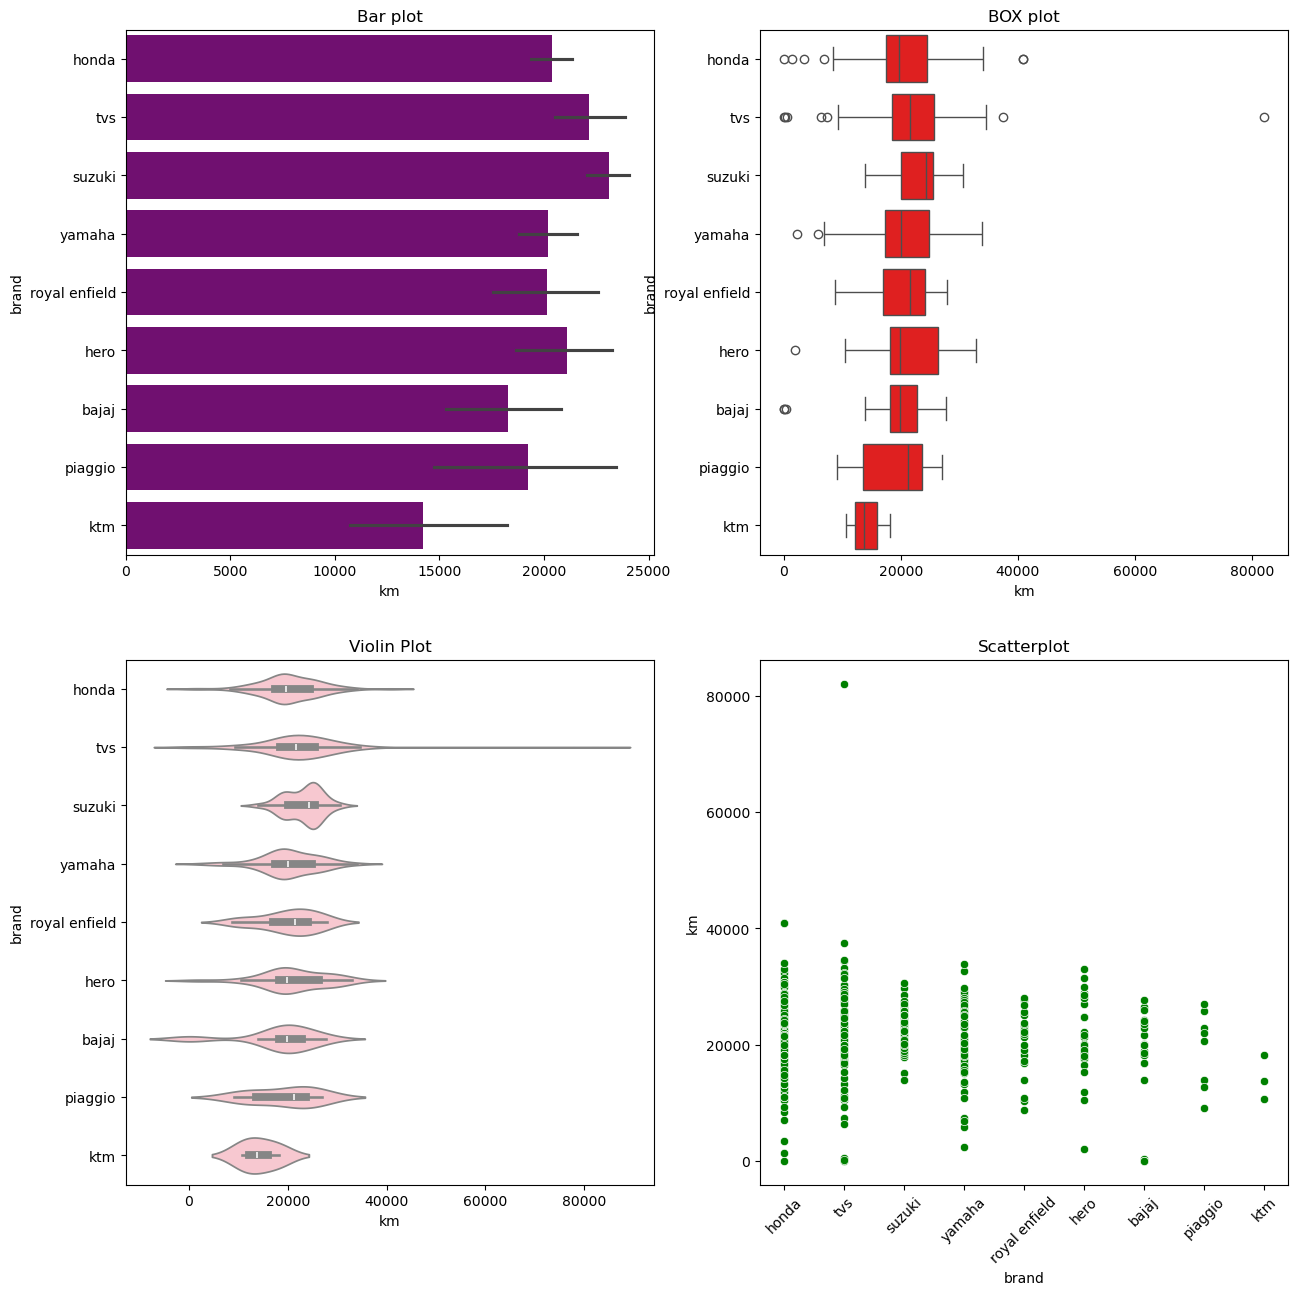

                     mean  median  min  max
brand                                      
bajaj          170.880000   150.0  100  220
hero           110.533333   110.0   94  125
honda          117.188679   109.0   11  163
ktm            233.000000   249.0  200  250
piaggio        131.375000   125.0  124  154
royal enfield  346.550000   346.0  346  350
suzuki         124.640000   125.0  124  125
tvs            123.093458   110.0   87  197
yamaha         149.194444   149.0  103  250


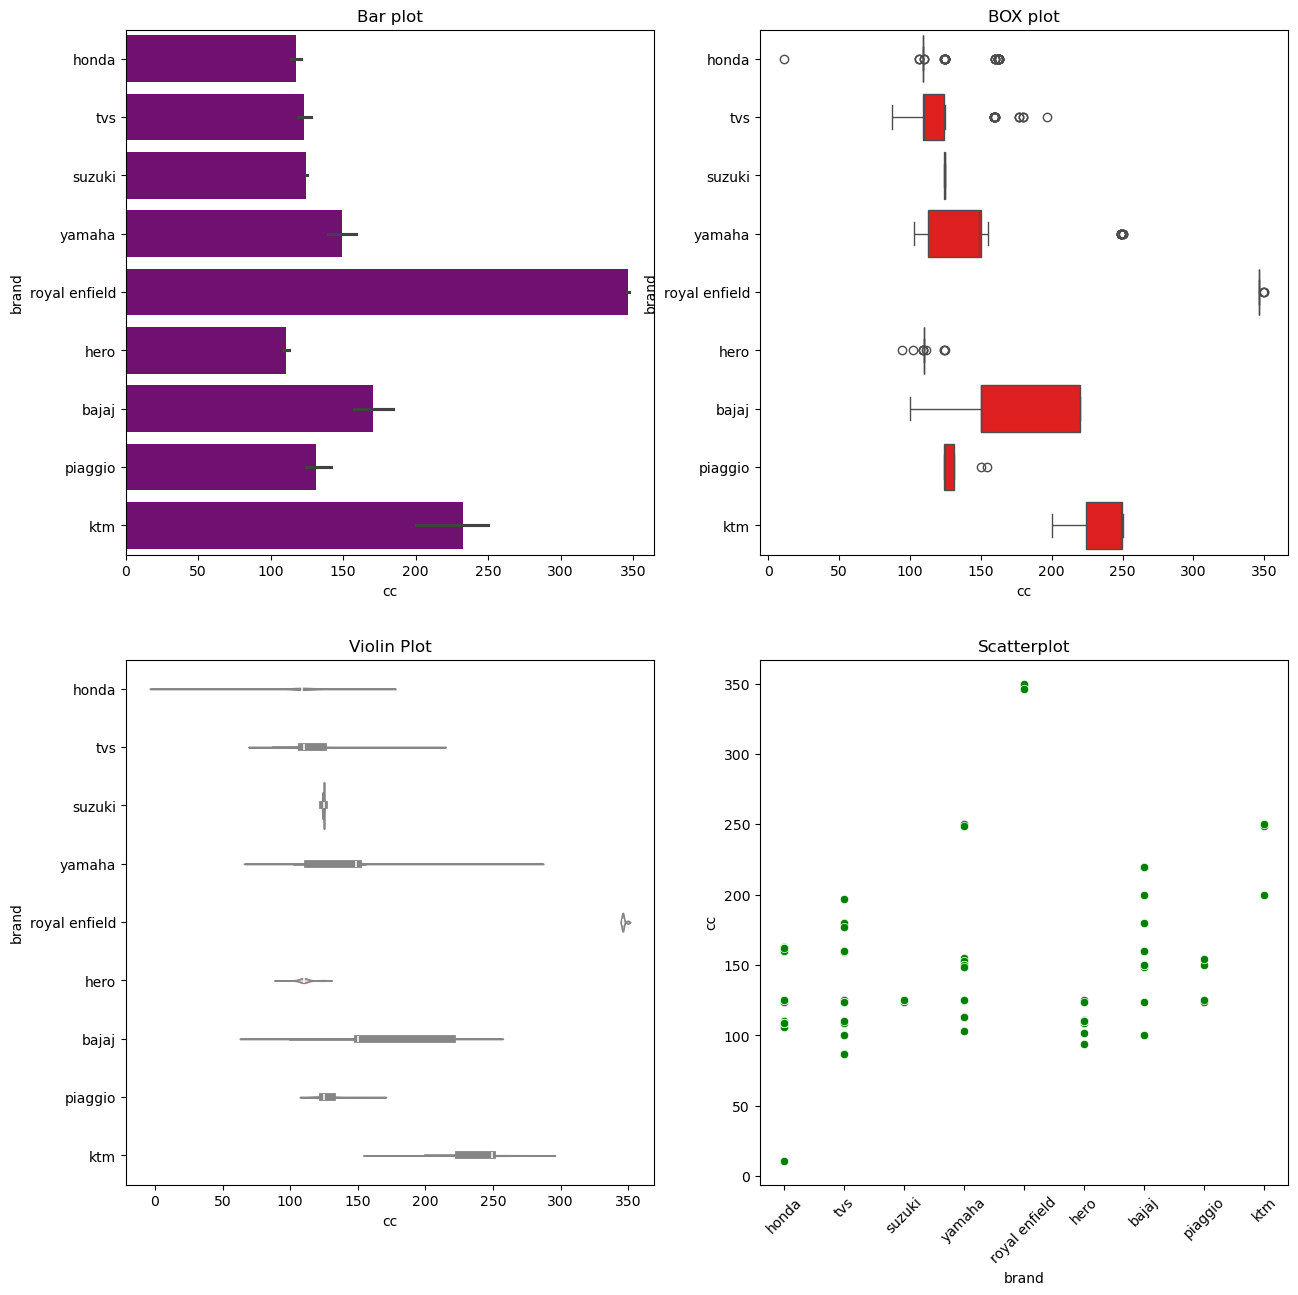

                   mean  median  min  max
brand                                    
bajaj          1.440000     1.0    1    2
hero           1.666667     2.0    1    3
honda          1.201258     1.0    1    3
ktm            1.333333     1.0    1    2
piaggio        1.125000     1.0    1    2
royal enfield  1.100000     1.0    1    2
suzuki         1.380000     1.0    1    3
tvs            1.420561     1.0    1    3
yamaha         1.166667     1.0    1    2


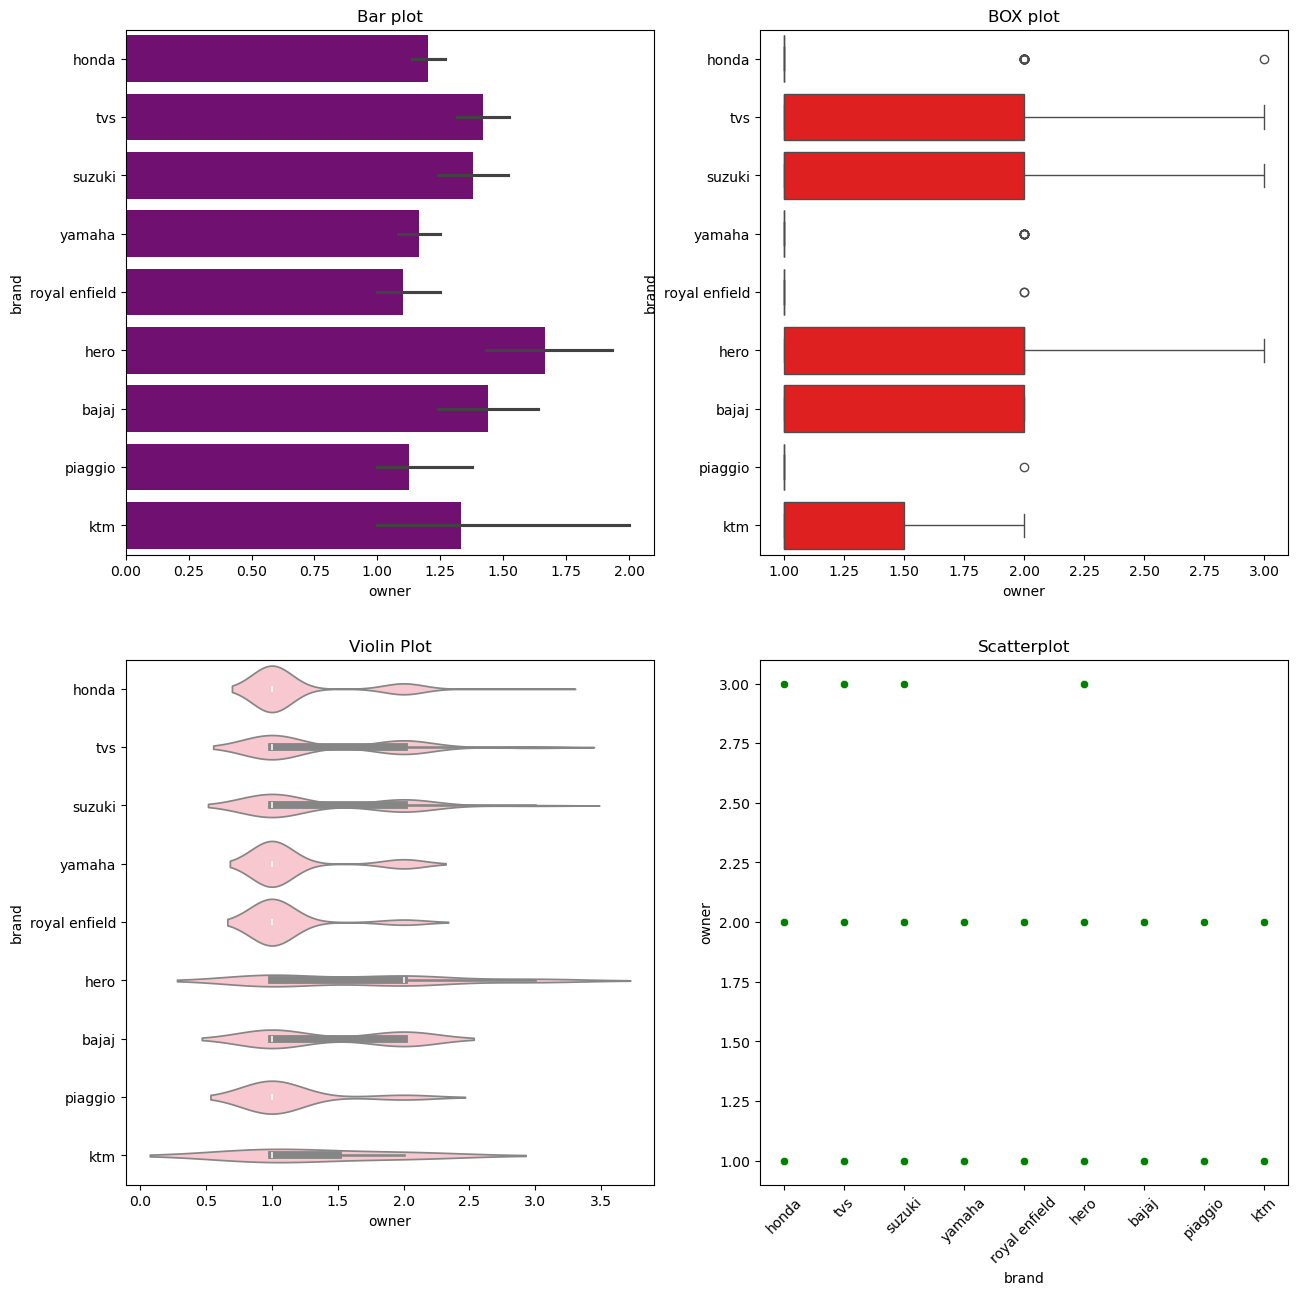

                        mean    median     min      max
brand                                                  
bajaj           77759.600000   79000.0   50000   100000
hero            55600.000000   54750.0   47000    75000
honda           71365.974843   70000.0   44000   105000
ktm            188333.333333  183000.0  170000   212000
piaggio         82125.000000   84000.0   70000    91000
royal enfield  171000.000000  165500.0   68000   215000
suzuki          59319.800000   55500.0   38000    93000
tvs             73700.560748   75000.0   36000   115000
yamaha         109333.333333   83000.0   44000  1117000


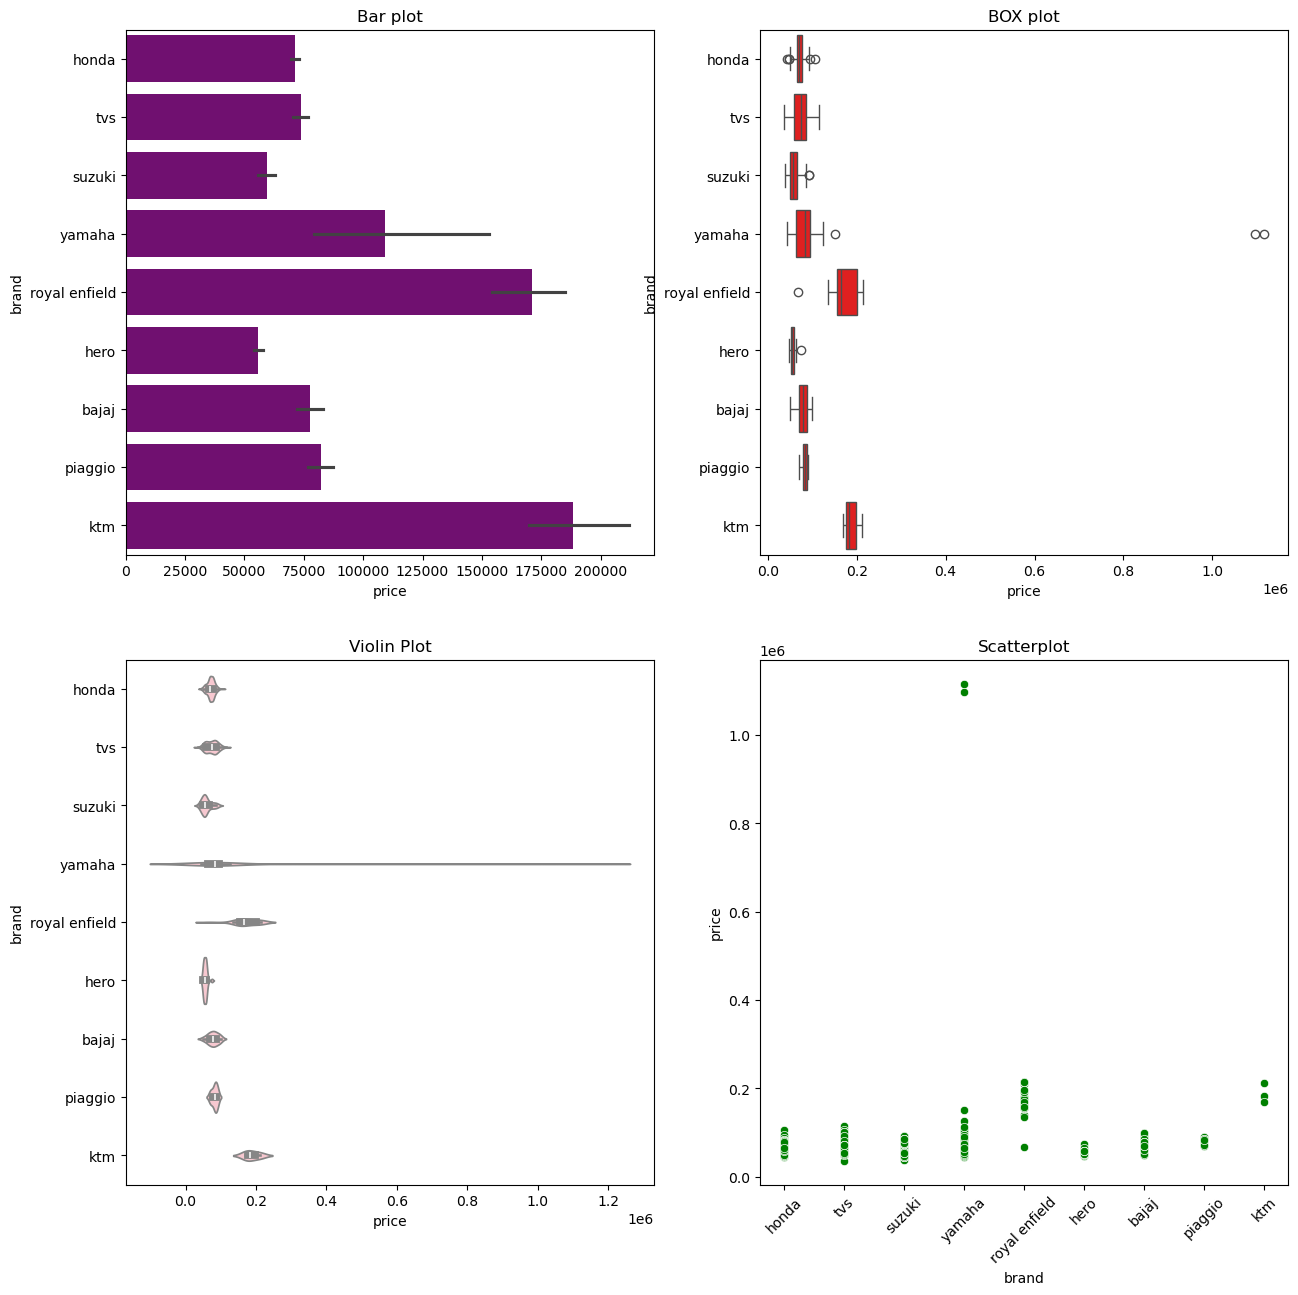

                        mean    median     min      max
brand                                                  
bajaj           80759.600000   82000.0   53000   103000
hero            58600.000000   57750.0   50000    78000
honda           74410.000000   73000.0   47000   108000
ktm            191333.333333  186000.0  173000   215000
piaggio         85125.000000   87000.0   73000    94000
royal enfield  174000.000000  168500.0   71000   218000
suzuki          62319.800000   58500.0   41000    96000
tvs             76700.560748   78000.0   39000   118000
yamaha         112333.333333   86000.0   47000  1120000


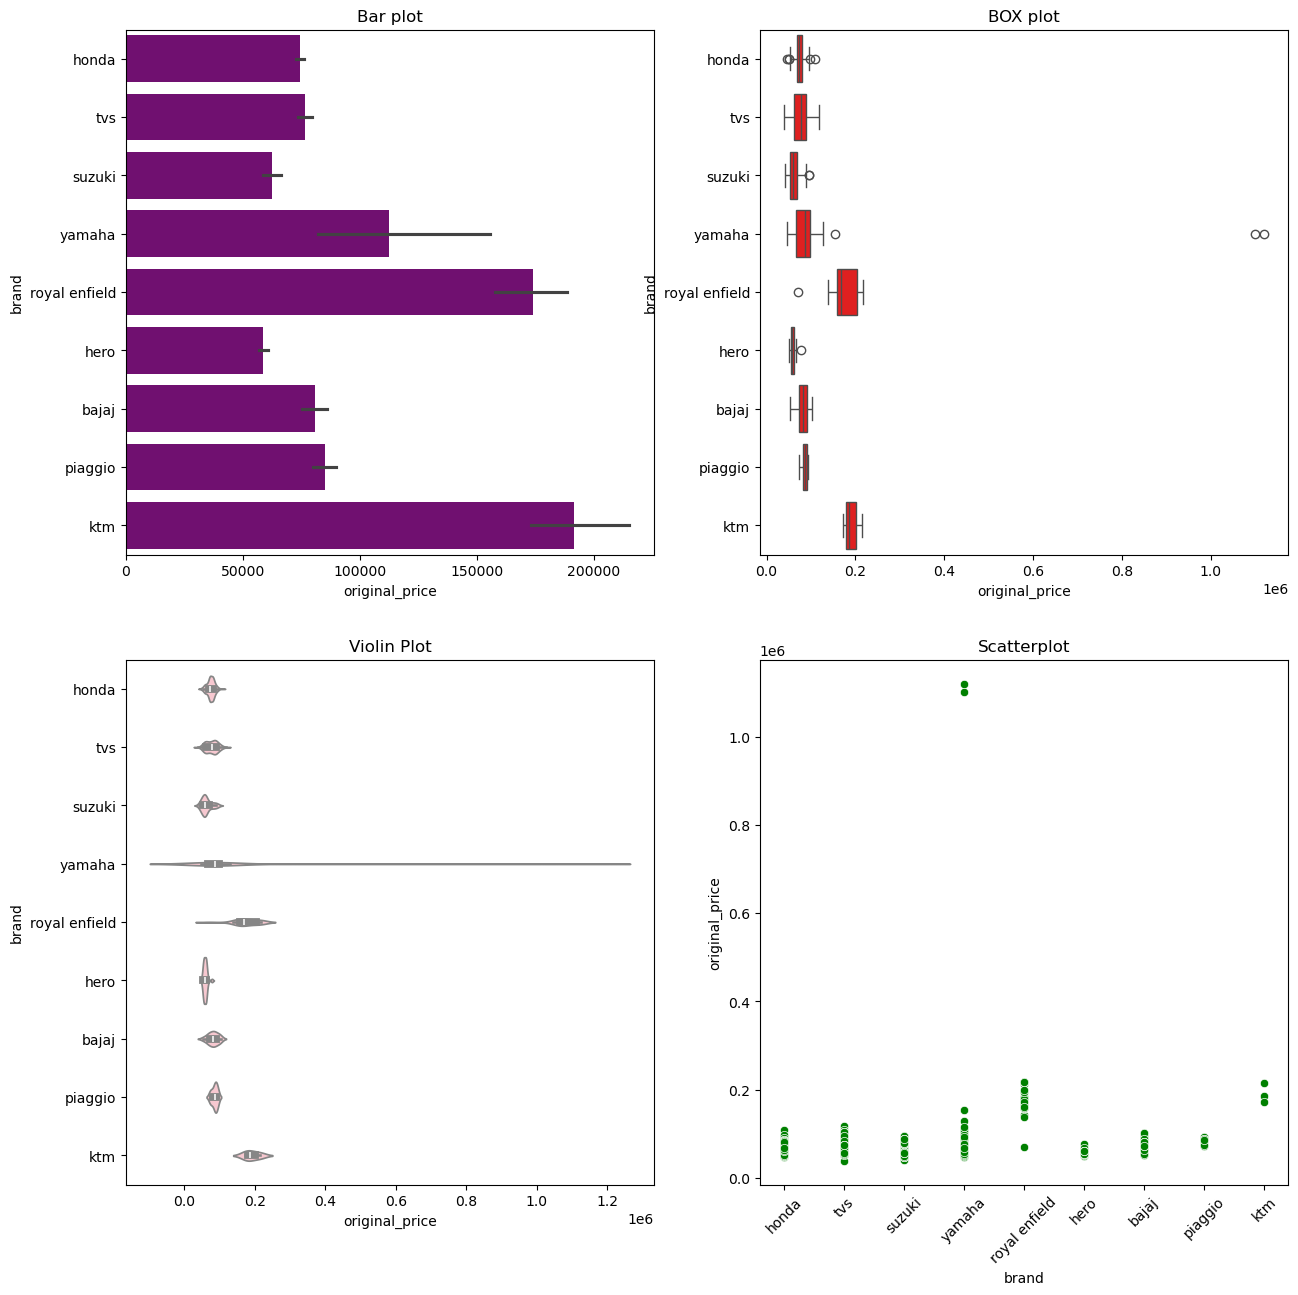

In [344]:
cat_num(df,'brand',num_cols)